# Modeling the Joint Distribution of Wind Speed and Direction  using Gaussain Mixture Modles

OEN Method: Harris, Cook
The parent wind speed distribution: Why Weibull?
http://www.sciencedirect.com/science/article/pii/S0167610514001056

Gaussian Mixture Models, 
http://scikit-learn.org/stable/modules/mixture.html

# 1. Set up

## 1.1 Environment

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

# from __future__ import division
from import_file import *
from helpers.parallel_helper import *
load_libs()

## 1.2 Read Data

In [2]:
# ipath= "./data/NCDC/us/baltimore/dat.txt" # time too short
# ipath= './data/NCDC/uk/boscombe_down/dat.txt' # 4?
# ipath= './data/NCDC/uk/middle_wallop/dat.txt' # good
# ipath= './data/NCDC/uk/southhamption/dat.txt' # high 0
# ipath= './data/NCDC/uk/bournemouth/dat.txt' 4?
ipath= './data/NCDC/uk/tiree/dat.txt'  # try 4
# ipath= "./data/NCDC/uk/bealach_na_ba/dat.txt" # 
# ipath= "./data/NCDC/uk/skye_lusa/dat.txt" # 
# ipath= "./data/NCDC/uk/south_uist_range/dat.txt" 
# ipath= './data/NCDC/uk/marham/dat.txt' 
# ipath= "./data/NCDC/uk/holbeach/dat.txt"
# ipath= "./data/NCDC/uk/weybourne/dat.txt"
# ipath= "./data/NCDC/uk/cambridge/dat.txt"
# ipath= "./data/NCDC/uk/wattisham/dat.txt"
# ipath= "./data/NCDC/uk/benbecula/dat.txt" # truncate (untruncate in m/s), 4?

# ipath= "./data/NCDC/southeast_asia/singapore_changi/dat.txt" # 4 or 5?
# ipath= "./data/NCDC/southeast_asia/sultan_ismail/dat.txt" # 
# ipath= "./data/NCDC/southeast_asia/paya_lebar/dat.txt" # 2010-2014 has problem
# ipath= "./data/NCDC/east_asia/cheongju_intl/dat.txt" # 2005-2009  may have problem, fit is good
# ipath= "./data/NCDC/east_asia/daegu_ab/dat.txt" # recent 5 year may have problem, but fit is generally good

# ipath= "./data/NCDC/canada/melita_man/dat.txt" # 
# ipath= "./data/NCDC/canada/mildred_lake_alta/dat.txt" # uptail wind speed 
# ipath= "./data/NCDC/canada/manouane_est_que/dat.txt"  
# ipath= "./data/NCDC/canada/argentia/dat.txt" 

# ipath= "./data/NCDC/europe/landsberg_lech/dat.txt" # very good, can try 4
# ipath= "./data/NCDC/europe/vatry/dat.txt"  # double peak, initial speed (should be good with m/s)
# ipath= "./data/NCDC/europe/avord/dat.txt" # try 4, initial speed (should be good with m/s)
# ipath= './data/NCDC/europe/ciampino/dat.txt' # try 4, bandwidth?
# ipath= "./data/NCDC/europe/holzdorf/dat.txt"
# ipath= "./data/NCDC/europe/neuburg/dat.txt"
# ipath= "./data/NCDC/europe/valladolid/dat.txt"
# ipath= "./data/NCDC/europe/laupheim/dat.txt" # double peak, 4; very good
# ipath= "./data/NCDC/europe/barayas/dat.txt" # 
# ipath= "./data/NCDC/europe/huspel_aws/dat.txt"  # integer, 4?
# ipath= "./data/NCDC/europe/diepholz/dat.txt" # recent year is integer with less data, use m/s
# ipath= './data/NCDC/europe/tenerife_sur/dat.txt'  # some directions are blocked

# ipath= "./data/NCDC/oceania/narrandera/dat.txt" # high 0
# ipath= "./data/NCDC/oceania/brisbane_archerfield/dat.txt" # high 0
# ipath= "./data/NCDC/oceania/auckland_intl/dat.txt"  # Weird KDE shape, 4?
# ipath= "./data/NCDC/oceania/canberra/dat.txt" # high 0

# ipath= "./data/NCDC/cn/shanghai/hongqiao_intl/dat.txt" 
# ipath= "./data/NCDC/cn/shanghai/pudong/dat.txt"
# ipath= "./data/NCDC/cn/tianjing/binhai/dat.txt" # recent 5 year has small problem, good overall, few 0
# ipath= "./data/NCDC/cn/tianjing/tianjing/dat.txt" # 16 sectors
# ipath= "./data/NCDC/cn/hefei_luogang/dat.txt" # recent 5 year has small problem, good overall, few 0
# ipath= "./data/NCDC/cn/南京lukou/dat.txt" 
# ipath= "./data/NCDC/cn/shijiazhuang_zhengding/dat.txt" 
# ipath= "./data/NCDC/cn/henan_gushi/dat.txt" # 16 sectors, fit not very good
# ipath= "./data/NCDC/cn/郑州xinzheng/dat.txt" # fit is not good
# ipath= "./data/NCDC/cn/nanning_wuxu/dat.txt" # recent 5 year has problem
# ipath= './data/NCDC/cn/macau/dat.txt'  
# ipath= "./data/NCDC/cn/hk_intl/dat.txt" # few initial data

# ipath= "./data/NCDC/us/sheboygan/dat.txt" # untruncate us dataset, but recent 5 year maybe corrupted

# ipath= "./data/cn_database/广州.txt" 
# ipath= "./data/cn_database/北京.txt" 

uipath = ipath

if not "cn_database" in ipath: 
    df = pd.read_csv(uipath,header=0, skipinitialspace=True)
    df.rename(columns={'Date':'date','Dir':'dir','Spd':'speed','Type':'type','I.1':'wind_type'}, inplace=True)
    df = df[['date','HrMn','type','dir','speed','wind_type' ]]
else:
    df = read_cn_database(uipath)

In [3]:
df = df.query("(dir <= 999) & (speed < 100) & \
              (date >= 19700000) & (date < 20160000) ")

/Users/cqcn1991/anaconda/lib/python3.6/site-packages/matplotlib/__init__.py:938: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


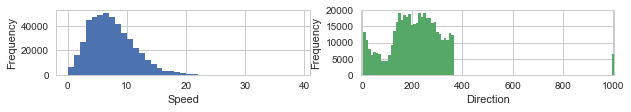

In [4]:
plot_speed_and_angle_distribution(df.speed, df.dir)

In [5]:
# Dir [10,360]=> [0,350]
df['dir'] = df['dir'].apply(lambda x: x%360 if x < 999 else x) 
df['month'] = df['date']%10000//100
# Convert Windrose coordianates to Polar Cooridinates 
df['dir_windrose'] = df['dir']
df['dir'] = df['dir'].apply(lambda x: (90 - x)%360 if x < 999 else x)
df.describe()

date           HrMn            dir          speed  \
count  4.703340e+05  470334.000000  470334.000000  470334.000000   
mean   2.000300e+07    1153.105529     205.386744       7.283531   
std    1.127487e+05     669.378092     128.859325       3.840740   
min    1.979010e+07       0.000000       0.000000       0.000000   
25%    1.990101e+07     600.000000     130.000000       4.600000   
50%    2.002061e+07    1120.000000     200.000000       6.700000   
75%    2.011052e+07    1700.000000     270.000000       9.800000   
max    2.015123e+07    2350.000000     999.000000      38.600000   

               month   dir_windrose  
count  470334.000000  470334.000000  
mean        6.562462     205.010760  
std         3.449571     133.522418  
min         1.000000       0.000000  
25%         4.000000     140.000000  
50%         7.000000     200.000000  
75%        10.000000     270.000000  
max        12.000000     999.000000

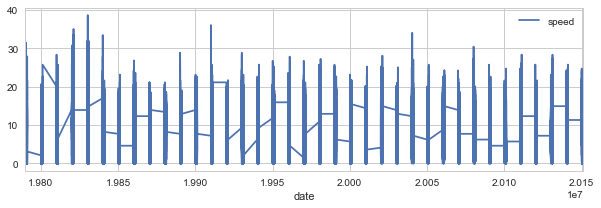

In [6]:
df.plot(x='date', y='speed',legend=True,figsize=(10,3))

### 1.2.1 Unit Detection

True


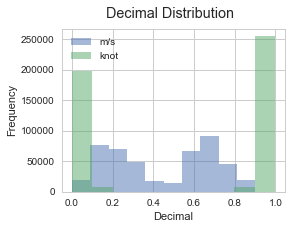

In [7]:
df['decimal'] = df.speed % 1
df.decimal.hist(alpha=0.5, label='m/s', figsize=(4, 3))
knot_unit = True if len(df.query('decimal >= 0.2')) / len(df) > 0.3 else False

# knot_unit = False

if knot_unit:
    df['speed'] = df['speed'] * 1.943845
    df['decimal'] = df.speed % 1
    df.decimal.hist(alpha=0.5, label='knot')
    # need more elaboration, some is not near an integer
    df['speed'] = df['speed'].apply(lambda x: int(round(x)))
plt_configure(xlabel='Decimal', ylabel='Frequency', legend={'loc': 'best'}, title='Decimal Distribution')

print(knot_unit)

### 1.2.2 Sampling Type Selection

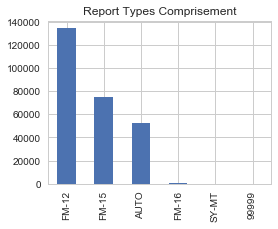

In [8]:
sample_type = df.query('date > 20000000')['type']
sample_type.value_counts().plot(
    kind = 'bar', title = 'Report Types Comprisement', figsize=(4,3))

report_type_most_used = sample_type.value_counts().argmax()
df = df.query("type==@report_type_most_used")

### 1.2.3 Sampling Time Selection

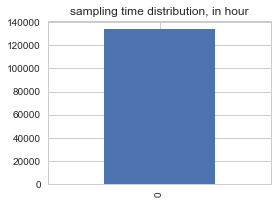

In [9]:
df['sample_time'] = df.HrMn % 100 
sample_time = df.query('date > 20000000')['sample_time']
sample_time.value_counts().plot(
    kind = 'bar', title = 'sampling time distribution, in hour', figsize=(4,3))

# Need more elaboration
sample_times = sample_time.value_counts()[sample_time.value_counts() > 2000]
sample_times = sample_times.index.tolist()
# sample_times =  [sample_times.index[0]]
df = df.query("sample_time in @sample_times")
df.drop(['sample_time'], 1,inplace=True)

In [10]:
df['HrMn'].value_counts().sort_index()

0       12808
100     12822
200     12815
300     12886
400     12847
500     12821
600     12879
700     12630
800     12191
900     11708
1000    11228
1100    11225
1200    11571
1300    11792
1400    12068
1500    12481
1600    12625
1700    12713
1800    12844
1900    12798
2000    12803
2100    12909
2200    12834
2300    12834
Name: HrMn, dtype: int64

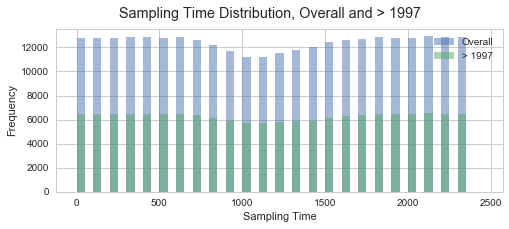

In [11]:
MID_YEAR = (min(df.date)//10000+max(df.date)//10000)//2
bins=arange(0, 2400+100, 50)

df['HrMn'].plot(kind='hist', alpha=0.5,bins=bins, label='Overall')

df.query('date > @MID_YEAR * 10000')['HrMn'].plot(
    kind='hist', alpha=0.5,bins=bins, label='> %s' %  MID_YEAR )

plt_configure(xlabel='Sampling Time', ylabel='Frequency', legend={'loc':'best'}, figsize=(8, 3), 
              title = 'Sampling Time Distribution, Overall and > %s ' %  MID_YEAR)

## 1.3 Data Wrangling

### 1.3.1 Artefacts

#### 1.3.1.1 wrong direction record

In [12]:
display(df.query("(dir % 10 >= 0.1) & (dir != 999)"))
df = df.query('(dir % 10 <= 0.1) | (dir == 999)')

Empty DataFrame
Columns: [date, HrMn, type, dir, speed, wind_type, month, dir_windrose, decimal]
Index: []

#### 1.3.1.2 sudden increase in speed

date  HrMn   type  dir  speed wind_type  month  dir_windrose  \
120455  19910103   600  FM-12  200     70         N      1           250   
253470  20040421  1100  FM-12  290     66         N      4           160   
44291   19831018  1400  FM-12  210     61         N     10           240   
3032    19790509   100  FM-12  140     61         N      5           310   
97226   19890213  1500  FM-12  160     56         N      2           290   
146657  19930121  2100  FM-12  180     56         N      1           270   
367283  20111208  1400  FM-12  180     55         N     12           270   
3702    19790606   400  FM-12  250     55         N      6           200   
18751   19810227   400  FM-12  320     55         N      2           130   
146499  19930117   500  FM-12  180     55         N      1           270   

         decimal  incre  incre_reverse  
120455  0.978420   44.0           46.0  
253470  0.090730   33.0           32.0  
44291   0.036733   31.0           24.0  
3032    0.036733   45.0           48.0  
97226   0.982736    6.0            6.0  
146657  0.982736    8.0            6.0  
367283  0.010814    3.0            6.0  
3702    0.010814   49.0           48.0  
18751   0.010814   19.0           22.0  
146499  0.010814   12.0            3.0

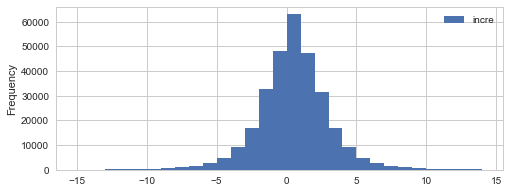

In [13]:
# sudden increse
df['incre'] = df.speed.diff(1)
df['incre'].fillna(0, inplace=True)
df['incre_reverse'] = df.speed.diff(-1)
df['incre_reverse'].fillna(0, inplace=True)

display(df.sort_values(by='speed',ascending=False).head(10))
df['incre'].plot(kind='hist', bins=arange(-15, 15), legend=True, figsize=(8, 3))

In [14]:
incre_threshold = 20 if knot_unit else 10
print('sudden increase number', len(df.query('(incre > @incre_threshold )&(incre_reverse > @incre_threshold )')))
df = df.query('(incre < @incre_threshold )|(incre_reverse < @incre_threshold )')

sudden increase number 22


After Simple Aretefacts Handling

In [15]:
# Check the max speed
df.sort_values(by='speed',ascending=False).head(10)

date  HrMn   type  dir  speed wind_type  month  dir_windrose  \
146657  19930121  2100  FM-12  180     56         N      1           270   
97226   19890213  1500  FM-12  160     56         N      2           290   
146499  19930117   500  FM-12  180     55         N      1           270   
367283  20111208  1400  FM-12  180     55         N     12           270   
18751   19810227   400  FM-12  320     55         N      2           130   
47032   19840121  1900  FM-12  310     54         N      1           140   
8326    19791217   100  FM-12  210     54         N     12           240   
367281  20111208  1200  FM-12  190     54         N     12           260   
8325    19791217     0  FM-12  210     53         N     12           240   
292545  20080109   500  FM-12  170     53         N      1           280   

         decimal  incre  incre_reverse  
146657  0.982736    8.0            6.0  
97226   0.982736    6.0            6.0  
146499  0.010814   12.0            3.0  
367283  0.010814    3.0            6.0  
18751   0.010814   19.0           22.0  
47032   0.038891    4.0            2.0  
8326    0.038891    1.0            2.0  
367281  0.038891    2.0            2.0  
8325    0.066969    1.0           -1.0  
292545  0.872584   13.0           15.0

### 1.3.2 Direction re-aligment and 999
For some dataset, the 16 sectors are not record properly,

e.g. the sectors are [0,20,30,50], need to redistribute the angle into 22.5

In [16]:
display(df['dir'].value_counts().sort_index())
effective_column = df.query('dir < 999')['dir'].value_counts()[df['dir'].value_counts() > 30].sort_index()
SECTOR_LENGTH = 360/len(effective_column)
print(len(effective_column), SECTOR_LENGTH)

0       2844
10      2774
20      4149
30      4400
40      4500
50      3914
60      5092
70      6598
80      8572
90      8342
100     8554
110     7151
120     7541
130     6931
140     7978
150     8396
160    10301
170    10061
180    10951
190    11003
200    12180
210    11258
220    12002
230    10130
240    10149
250     9770
260    11952
270    11010
280    11943
290    10906
300    12159
310    10136
320     8728
330     5788
340     4119
350     2792
999     4033
Name: dir, dtype: int64

36 10.0


In [17]:
df=realign_direction(df, effective_column)

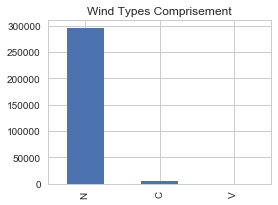

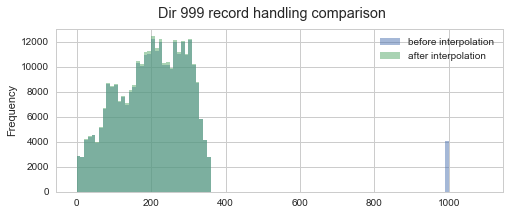

In [18]:
df=fill_direction_999(df, SECTOR_LENGTH)

### 1.3.3 Time Shift Comparison

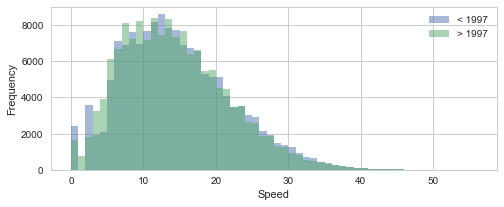

In [19]:
DIR_REDISTRIBUTE = 'even'
if DIR_REDISTRIBUTE == 'even':
    DIR_BIN = arange(-5, 360, 10) 
elif DIR_REDISTRIBUTE == 'round_up':
    DIR_BIN = arange(0, 360+10, 10) 

# Comparison between mid_year, looking for: 
# 1. Odd Even Bias
# 2. Time Shift of Wind Speed Distribution
bins = arange(0, max(df.speed) + 1)
df.query('date < @MID_YEAR * 10000')['speed'].plot(
    kind='hist', alpha=0.5,bins=bins, label='< %s' % MID_YEAR)

df.query('date > @MID_YEAR * 10000')['speed'].plot(
    kind='hist', alpha=0.5,bins=bins, label='> %s' % MID_YEAR)

plt.suptitle('Speed Comparison between year < %s, > %s ' % (MID_YEAR, MID_YEAR), fontsize = 14)
plt_configure(xlabel='Speed', ylabel='Frequency', legend=True, figsize=(8, 3))

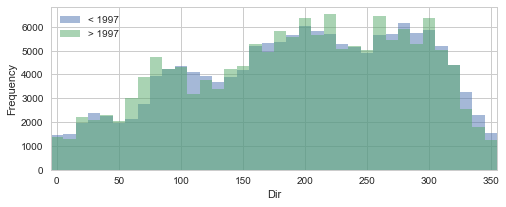

In [20]:
df.query('date < @MID_YEAR * 10000')['dir'].plot(
    kind='hist', alpha=0.5,bins=DIR_BIN, label='< %s' % MID_YEAR)

df.query('date > @MID_YEAR * 10000')['dir'].plot(
    kind='hist', alpha=0.5,bins=DIR_BIN, label='> %s' % MID_YEAR)

plt.suptitle('Dir Comparison between year < %s, and > %s ' % (MID_YEAR, MID_YEAR), fontsize = 14)
plt_configure(xlabel='Dir', ylabel='Frequency', legend={'loc':'best'}, figsize=(8, 3),tight='x')

1979 - 1979


/Users/cqcn1991/anaconda/lib/python3.6/site-packages/matplotlib/__init__.py:938: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


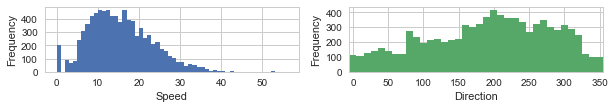

1980 - 1984


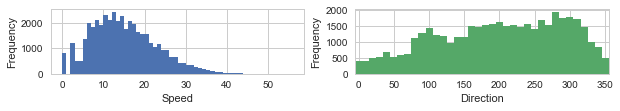

1985 - 1989


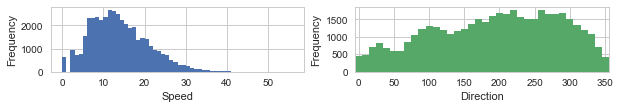

1990 - 1994


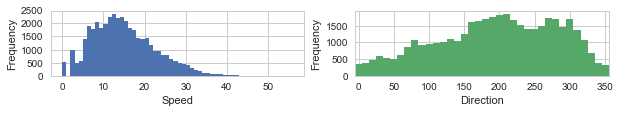

1995 - 1999


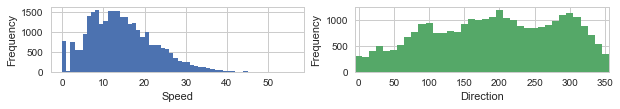

2000 - 2004


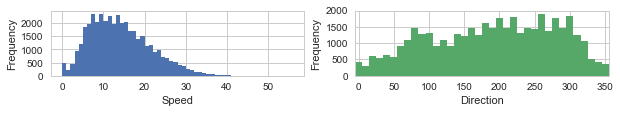

2005 - 2009


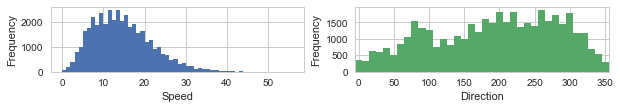

2010 - 2014


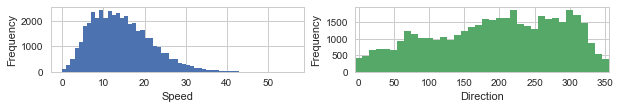

2015 - 2015


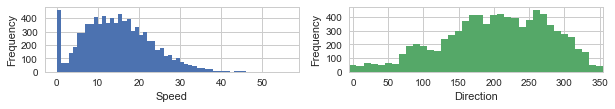

In [21]:
# Inspect the time shift of speed and degree distribution, and odd-even bias
check_time_shift(df)

### 1.3.4 0 Speed

In [22]:
with_too_many_zero, null_wind_frequency = is_with_too_many_zero(df.query("(date >= 20050000)"))
delete_zero = with_too_many_zero
if delete_zero:
    df = df.query('(speed > 0)')
print(delete_zero, null_wind_frequency)

False 0.00669354143313


## 1.4 Re-distribute Direction and Speed
e.g. Dir 50 -> -45 ~ 55, to make KDE result better

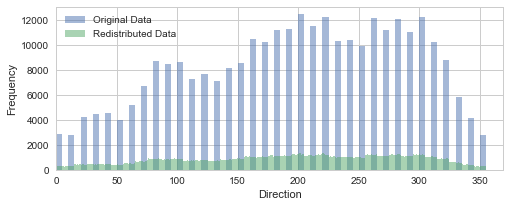

In [23]:
# Randomize the angle degree, to form a better KDE estimation
df = randomize_angle(df, DIR_REDISTRIBUTE, SECTOR_LENGTH)

Redistribute upward, e.g. 0 -> [0,1]


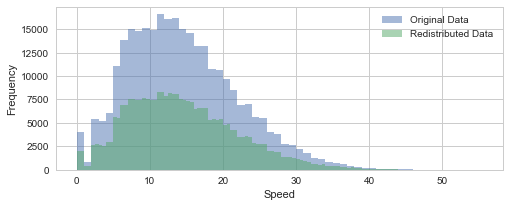

In [24]:
if delete_zero:
    redistribute_method = 'round_down'
else:
    redistribute_method = 'round_up'
df, speed_redistribution_info = randomize_speed(df, redistribute_method)

## 1.5 Generate (x,y) from (speed,dir)

In [25]:
# Cook orientation
# df['dir']= (df['dir'] + 180)%360

In [26]:
# There might be a small dot in the centre, which is due to too many zero (more than 1 speed) in center
# Scatter plot in matplot has performance issue, the speed is very slow
df['x'] = df['speed'] * cos(df['dir'] * pi / 180.0)
df['y'] = df['speed'] * sin(df['dir'] * pi / 180.0)

# 2. Re-select Data and Configs

## 2.1 Data Overview

In [27]:
## Summery of the data selection
print('Knot unit?', knot_unit)
print('Incre_threshold for artefact detection:', incre_threshold) 
print('Report type used:', report_type_most_used)
print('Sampling time used:', sample_times)
print('delete_zero?', delete_zero)
if 'speed_redistribution_info' in globals():
    print('Speed redistribution info:', speed_redistribution_info )

df_all_years = df # for later across-year comparison
df = df_all_years.query('(date >= 20100000) & (date < 20150000)')
# df = df.query('(HrMn == 0) and (speed >= 0.5) and (date%10000 > 900) and (date%10000 < 1000)' )
df.describe()

Knot unit? True
Incre_threshold for artefact detection: 20
Report type used: FM-12
Sampling time used: [0]
delete_zero? False
Speed redistribution info: Redistribute upward, e.g. 0 -> [0,1]


date          HrMn           dir         speed         month  \
count  4.283700e+04  42837.000000  42837.000000  42837.000000  42837.000000   
mean   2.012072e+07   1148.978687    193.694939     14.401875      6.518150   
std    1.413668e+04    693.172819     90.975448      7.309065      3.459189   
min    2.010010e+07      0.000000     -4.990488      0.009791      1.000000   
25%    2.011040e+07    500.000000    122.685498      8.840285      4.000000   
50%    2.012070e+07   1100.000000    202.443584     13.505039      7.000000   
75%    2.013100e+07   1800.000000    271.007914     18.978560     10.000000   
max    2.014123e+07   2300.000000    354.998709     55.602005     12.000000   

       dir_windrose       decimal         incre  incre_reverse             x  \
count  42837.000000  42837.000000  42837.000000   42837.000000  42837.000000   
mean     191.330789      0.546484      0.000280      -0.000303     -2.265507   
std      102.782601      0.450140      2.535876       2.535862     10.599444   
min        0.000000      0.000000    -23.000000     -29.000000    -55.496421   
25%      130.000000      0.051839     -1.000000      -1.000000     -9.350778   
50%      200.000000      0.911451      0.000000       0.000000     -2.154640   
75%      270.000000      0.967607      1.000000       1.000000      5.065707   
max      999.000000      0.997842     29.000000      23.000000     36.267535   

                  y  
count  42837.000000  
mean      -2.885089  
std       11.620521  
min      -48.750543  
25%      -11.050574  
50%       -3.068233  
75%        5.529259  
max       37.798586

/Users/cqcn1991/anaconda/lib/python3.6/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


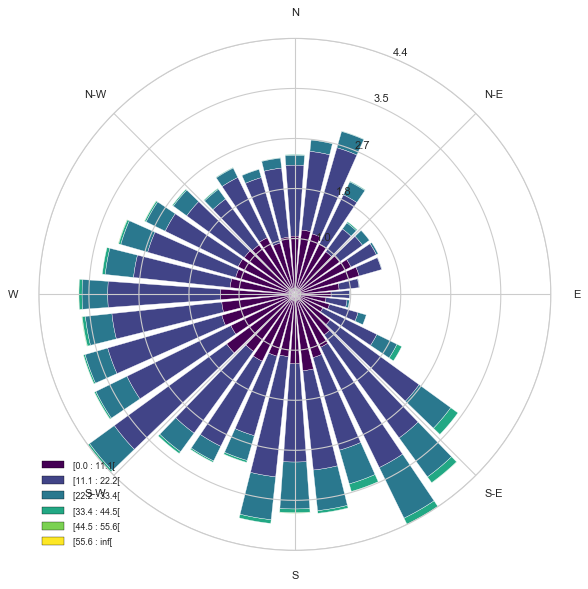

In [28]:
# 90 degree is east
ax = WindroseAxes.from_ax()
viridis = plt.get_cmap('viridis')
ax.bar(df.dir_windrose, df.speed, normed=True, opening=0.8, edgecolor='white', nsector=36, cmap=viridis)
ax.set_legend()

In [29]:
ax, _params = WindAxes.from_ax().pdf(df.speed, bins=arange(0, max(df.speed)))
weibull_params = sp.stats.exponweib.fit(df.speed, floc=0, f0=1)
plt_configure(figsize=(4,3),xlabel='V',ylabel='PDF')

fig,ax = plt.subplots()
ecdf = sm.distributions.ECDF(df.speed)
x = linspace(0, df.speed.max())
y = ecdf(x)
plot(log(x), log(-log(1-y)),'o', label='ECDF')

k_shape, lamb_scale = weibull_params[1], weibull_params[3]
y=1-exp(-(x/lamb_scale)**k_shape) # cdf
plot(log(x), log(-log(1-y)),'-', label='Weibull')
plt_configure(xlabel="ln(V)", ylabel="ln(-ln(1-P)",legend={'loc':'best'},figsize=(4,3))
align_figures()

/Users/cqcn1991/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:9: RuntimeWarning: divide by zero encountered in log
/Users/cqcn1991/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:13: RuntimeWarning: divide by zero encountered in log


<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAATQAAADlCAYAAADdlAuhAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAMTQAADE0B0s6tTgAAIABJREFUeJzt3Xtc1HW+x/HX3AABFVG5eDctTMW7CKaGFiaBiJZtteKt
bLt42tzVtV3zuFRqRyvTtcu2mZrrapkVotJmlqmYeEXxktdMURxuooIX5nb+GBlBEAad4TcMn+fj
wcP5zu8783szox9/1+9XZbFYLAghhBtQKx1ACCEcRQqaEMJtSEETQrgNKWhCCLchBU0I4TakoAkh
3IZW6QCOZDabMRqNqNVqVCqV0nGEEA5ksVgwm81otVrU6oq3xdyqoBmNRjIyMpSOIYRwotDQUDw8
PCpc5lYFraRqh4aGotFoKu1rMpnIyMiwq69SJKNjSEbHUDpjyfpvt3UGblbQSnYzNRqN3R94dfoq
RTI6hmR0DKUzVnY4SU4KCCHchhQ0IYTbkIImhHAbUtCEEG5DCpoQwm1IQXNBKpX1R6t17bNdQrga
KWhCCLchBU0I4Tbc6sLauqL0dYUygLoQN8kWmhDCbUhBE0K4DdnlVIDsMgrhHFLQapmD2Qdh4OcQ
sgb8jxH0dn2aeDdheIfhPNvjWVr7tVY6ohCKkV3OWuKa8RpTN0yly0dd4ME3IGgfeFxBX6TnYM5B
3tzyJm3nt2V80nguX7+sdFwhFCFbaLXAqYJTDPt8GAdzDuKh8aB4y0Q49DicDaPw2jWO5B1h0Z5F
fLb/MxanL2bxxi3w5UrI6im7tKJOkS00F5d7LZdHlj/CwZyDdA/qzu7ndsN370BmBFg0+Hj40CO4
B+/HvM+BFw7Qt2VfaHwcxveH1puVji9EjZKC5sq8c3lx+4ucuHCCgW0Gkjo+lc4BnW/bvbVfa34a
+xNs/yPorsLTMfx85ucaDCyEsqSguSqVGR57mpOFJwlrHkbSk0nU09Wr8mVatRa+nQfbXwbPQoYs
H2I9kSBEHSAFzVX1/gDabSDQK5C1T66lvmf9arxYBd++B7uf5dL1Szy+6nEKiwudFlUIVyEFzRU1
PgJRfwFgRrcZ+Nfzr7R7yegcZYdaV8H69wlvEc4vub8wIXkCFjlDINycFDQXY7aYIX6s9RjY9j8S
1iTszt/M5MHnj3+Ofz1/Vh5Yyb/2/MthOYVwRVLQXMyqg6ug5XbIvwe+n33X79eqYSuWDV8GwOTv
JnP20tm7fk8hXJXTC1pKSgoxMTEMHjyYhQsXlluu1+tJSEggOjqa0aNHk5eXB8DVq1fp3r07w4YN
s/2YTCZnx1VUsamYv/3wN2vj+7fAWPVJAHs8eu+jjO46msvFl5mYMvE2u6hC1H5OLWg5OTnMmTOH
ZcuWsW7dOnbt2sWWLVvK9ElMTGTEiBGkpKQQFxfHzJkzATh48CDh4eEkJSXZflx9vsK79dGujzh5
4SRkhlkvnHWgdwe/S1Pvpnzzyzdw/1cOfW8hXIVT7xRITU0lPDwcf3/rQe34+HjWr19P//79ATAY
DKSlpTF//nzb8lmzZmEwGMjIyECv1zNy5Eg0Gg2TJ0+mV69edq3Xni25kj7KbPXdLMwl6798/TJv
bH7D+uSGOYCqXJ/bv76qNvh5+jFv8DxGfTMKol+G40PA4H3Xv7+yn6N9JKNjKJ3RnvU6taBlZ2cT
EBBgawcEBKDX623tgoICfHx80Ol01jBaLb6+vuTn56NSqRgyZAgTJkzg0KFD/OEPfyA5OZlGjRpV
ud6MjAy7M1anr+P0tD1KT08HYPnJ5eReyaVv075s++3BMr3LZ7z19VW1rUIsIfRq3Itd7ILwebBl
Wpnld0OZz7F6JKNjuHJGpxY0s9lc7rnS07hXtBxArVYzduxYW7tTp06EhoayZ88eHnrooSrXGxoa
WuXuqclkIiMjw66+ztStWzeMZiNfbbHuBr455E0G3dKnsozdunWrVvuDoA8IWxQG/d6Cvc+UW15d
rvI5VkYyOobSGUvWXxmnFrSgoCB27Nhha2dnZxMUFGRr+/v7U1hYiNFoRKvVYjQaKSoqws/Pj1Wr
VtGvXz+Cg4MBsFgsaLX2xdVoNHZ/4NXp6wwajYYvD3/Jbxd/o1ezXkS2jaywz+0y3vp8Ve3eLXrD
vgTougwi/45G89Hd/QJ2ZHQVktExXDmjU08KREREsH37dnJzczEYDKxZs4bIyEjbcp1OR1hYGMnJ
yQAkJycTFhaGTqcjIyODzz77DIDjx49z6NAhevbsWdFqajWLxcKTC94GYNf8yWW2YEtotZq7OitZ
7qzmxplg8IIe/+Jo3tE7TC6E63FqQQsMDGTKlCmMGzeO2NhYQkJCiIqKYtq0aWzcuBGAGTNmkJSU
RExMDKtWrWL69OkATJo0iV9//ZWYmBgmTZrEnDlz8PX1dWZcRWw5vQWa74KC1nD4sZpZ6aWWsGMi
qM28ufnNmlmnEDXA6eOhRUdHEx0dXea5kkszAIKDg1myZEm51zVq1IiPPnLM7pAr++fuf1ofpP0P
mGtweLptU6D3ByzPWM5rA17jvsb31dy6hXASuVNASV4XWH1oNZh0sG9Mza67KAB2voTZIltpwn1I
QVNS6Aqum67DL8PgSpOaX/+2yXjrvFmesVyOpQm3IAVNSd0XWf/cO16Z9RcF8GKvFzFbzMxNnatM
BiEcSAqaUoLSodkemtdvDicGKxZjUsQkdGodn+3/jPOF5xXLIYQjSEFTSvdPARjbbSxYlLump1n9
ZozqMopiUzEL0hYolkMIR5CCpgSVCTp9DsCYrjV8MqACk/tOBuDDXR/KFHiiVpOCpoTWm8E3G871
4N7G9yqdho5NOxJ7XywF1wr4ZM8nSscR4o5JQVNCZ+vWGQd/p2yOUqb0nQLAgh0LMJldd8QHISoj
Ba2GGc1GuH+1tXFwpLJhSunfqj/dgrpxquAUa4+uVTqOEHdECloN23RqE/jkwtneUNBW6Tg2KpWK
l8NeBqxbaULURlLQatgXB7+wPjj4hLJBKvBU6FM08W7CD7/+wIHsA0rHEaLapKDVgJKRLoxmI18d
vjH8tQvtbpbw0nrxXI/nAAh95h8y74CodaSg1aBtZ7aRdzUPzvaCi62VjlOhF3q/gEalsY6X5lWg
dBwhqkUKWg1KPmId942jQ5UNUokWDVowrMMw67ygXZYpHUeIapGCVoOSj94oaEdct6ABvNDrBeuD
3h8CMtu6qD2koNWUxkc5kneEFg1awPm7G8ffGUofLxvUdhDktYemh6H1lspfKIQLkYJWU+6zbp3F
3htL6SnqXJFapYbdf7A2en2obBghqkEKWk0JsRa0oSGuvbtpkz4WjJ7QcTXZRdlKpxHCLlLQaoLX
BWi1FW+dt3V3rja40sQ6e7vGwNL0pUqnEcIuUtBqQrvvQG0i6p4ovLReSqex3+4JAHyy9xMsFjk5
IFyfFDQHKzdlHFgLGjCk/RBlQt2p3wZA3r0czTtqnZ1KCBfn9IKWkpJCTEwMgwcPZuHCheWW6/V6
EhISiI6OZvTo0eTl5ZVZXlhYyMMPP0xaWpqzozqFxWKBdhsAGNxOuZFp74wK9jwLIMMKiVrBqQUt
JyeHOXPmsGzZMtatW8euXbvYsqXs//SJiYmMGDGClJQU4uLiykxxB/DGG29w6dIlZ8Z0qiN5R6Dh
Gchvxz2N7lE6TvWlj0Gr1rLq0CouXL2gdBohKuXUgpaamkp4eDj+/v7odDri4+NZv369bbnBYCAt
LY3Y2FgA4uPj2bRpEwaDAYD169fj4+NDSEiIM2M61XcnrLubSs4bcFeKAokLieOa8Rr/yfiP0mmE
qJRTZ7bNzs4mICDA1g4ICECv19vaBQUF+Pj4oNPprGG0Wnx9fcnPz8dkMrF06VKWLl3KhAkTqrVe
k6nqAQpL+tj

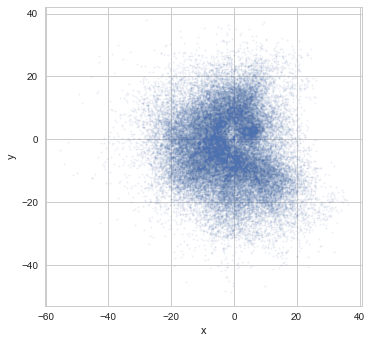

In [30]:
df.plot(kind='scatter', x='x', y='y', alpha=0.10, s=2)
plt.gca().set_aspect('equal')

## 2.2 Overview by Month

In [31]:
viridis = plt.get_cmap('viridis')

month_incre = 1
current_df = df.query('speed>=1')
for month in arange(1, 12+month_incre, month_incre): 
    end_month = month+month_incre
    sub_df = current_df.query('(month >= @month) and (month < @end_month)')
    if len(sub_df) > 0:
        if month_incre == 1:
            title = 'Month: %s' % (month)
        else:
            title = 'Month: %s - %s ' % (month, end_month-1)
        ax = WindroseAxes.from_ax()
        ax.bar(sub_df.dir_windrose, sub_df.speed, normed=True, opening=0.8, edgecolor='white', nsector=36, cmap=viridis)
        plt_configure(figsize=(3,3), title=title)
align_figures()

/Users/cqcn1991/anaconda/lib/python3.6/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAOwAAADxCAYAAADIm1tRAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAMTQAADE0B0s6tTgAAIABJREFUeJzsvXd4HNW9///aXqWVVtpV71a15YaxsTHBBbCpJhBfAgkl
hMsXEuASbhLgF8AhQAKBCySQkAokBEIJLSaEYoxpbmAbbMnqva6k1fZe5veH2MVCsi1Zo2Ki1/Po
eaSZnTOzo3nPOefTjkQQBIFZZpnluEA63RcwyyyzjJ1Zwc4yy3HErGBnmeU4Ylaws8xyHDEr2Flm
OY6YFewssxxHzAr2P4BZz91Xh1nBTgFr1qyhtLSUe++9d9T9XV1dlJaWUlpayuDgoKjn3rJlC5s2
bYr//cgjj7Bo0SJRz+F2u1m9ejVvvPGGqO3OMpJZwU4REomEt99+e9R9b7755qSd9y9/+QsWi2XS
2ne73Xzve9+ju7t70s4xyxfMCnaKWLRoEZ2dnRw8eHDEvjfeeIPS0tJpuKqJsXv3bjZu3Ehtbe10
X8p/DLOCnSLKy8vJyckZ0Zt2d3dz4MAB1q9fP+KYt99+mwsvvJCFCxdy6qmn8vDDDxMOh+P716xZ
wx//+Ec2bdrE0qVLWbx4MTfffDNutxuASy+9lN27d7Nt2zZKS0vp7OyMH/v666+zbt06KisrueCC
C9i7d298X2dnJ6WlpTzyyCNH/E7f//73KSkp4U9/+tMx3ZNZxs+sYKeQM844Y8Sw+M0332TBggWk
p6cP2/7cc89x3XXXMX/+fB599FG+/e1v8/jjj3PLLbcM+9zvf/97nE4nDz74IDfeeCP/+te/eOyx
xwDYtGkTFRUVLF68mOeeew6z2QyAz+fjoYce4oYbbuBXv/oVPp+P66+/Pv4yMJvNPPfcc2zcuPGI
3+fpp5/mV7/6FUajcUL3ZZaxI5/uC/hPYv369fz5z3+mqamJoqIiYGg4fOaZZw77XCQS4eGHH+bs
s8+OG4xWrlxJQkICmzZt4qqrrqKsrAyA9PR0HnzwQSQSCStXruS9997jT3/6E0uXLuXUU09Fr9ej
1Wq56aab+Otf/woMWY3vv/9+Fi5cCEA4HOb666+nsbGRsrIylEplfN+RKCkpEe3ezDI2ZnvYKaSy
spKMjAzeeustAHp6eti/fz/r1q0b9rnm5mYGBwdHDJPPPvtsAD755JNhbUokkvjfJpMJGOpdXS7X
qNchk8mYP39+/O+srCyAw35+lpnDrGCnEIlEMmxY/OabbzJ//nwyMjKGfc7hcACQkpIybHtCQgJK
pTI+RwXQaDQjziGTyVi5ciW/+MUvRr0OlUqFVPrFvz72ezQaPcZvNstUMSvYKeaMM86gurqazs5O
3nzzzRHDYYCkpCQArFbrsO1Op5NgMBjffyRuueUWduzYgd1uF+fCZ5kRzAp2ilm8eDEmk4lnn32W
zz77bMRwGKCgoIDk5OQRgQivv/56vI2jodfrueuuu2htbR1mWZ7l+GbW6DTFSKVSTj/9dJ588sn4
nPbLyGQyrrvuOu666y4MBgNr166lrq6ORx55hPXr14/Z2LNy5UpMJhP79u1Do9EQCATGdFwwGOTg
wYOkp6ePsF7PMr3M9rDTwBlnnEEoFBrV9xrj29/+Nvfccw+7du3immuu4emnn+Y73/kODzzwwLjO
9bOf/Qyfz8fAwACNjY1jOqavr4+LLrqIF154YVznmmXykczWdPpq0dnZyWWXXcbWrVvj2z788EO+
+93v8s4775CdnT2NVzfLRJkV7CyzHEfMDolnmeU4Ylaws8xyHDEr2FlmOY6Ydet8BYhGo0QikXhl
CUEQ4r9LJJJhPzKZbFgo43SwdetWHn30UbxeLytXruS2224btr+vr4/bbrsNi8WCRqPhgQcemDWW
fc6s0WkGIwgCoVCIYDBIKBSK/wQCgfi2cDg87pBCmUyGQqFAoVCgVCpRKpXxvxUKBSqVCrl8ct7l
HR0dXHLJJbzwwgukpKRw+eWXc/XVV7Nq1ar4Z6644grWrVvHxRdfzN///nd27NjBr3/960m5nuON
WcHOEARBIBgM4vV68Xg8eDwevF4v0WgUqVQa/5HL5cjl8rjQVCpV/PeYyKRSKZFIhE8//ZSFCxci
kUgQBIFwOEwwGCQQCIwQfUz40WgUQRBQKBRotdp4to9WqxVFxI8//jgWi4Vbb70VAIvFglKpJDk5
GYDBwUHOOussduzYgUQiIRgM0t3dTX5+/oTP/VVgdkg8TYTDYVwu1whxyuVyFAoFGo2GlJQUDAYD
CoViQueKBffLZDJUKhUJCQmH/awgCPh8PhwOBx6Ph4GBAUKhENFodJiIdToder1+3MPrtrY2lEol
3/3ud+nr62PNmjXceOON8f0dHR1kZmZy7733smPHDjIyMrjjjjuO7Yt/BZkV7BQSCASw2+3YbDY8
Hk98aKrVajGZTBgMBmQy2bReo0QiifeohxIMBrHZbDidTvr7++nu7kYikWAwGEhKShrztUciET74
4AOefvppdDod3/ve93j55Ze54IILgKEXWXV1Nd/73ve49dZbeeGFF7jlllt46qmnJuX7Hm/MCnYS
EQQBr9eLzWbDbrcTCARQKBTo9XqysrKO2NPNNJRKJWlpaaSlpQFDhq7BwUGsVivt7e1EIhF0Oh1G
oxGDwYBKpRq1ndTUVJYvXx5PHVy7di379++PC9ZkMqHVajnttNMAOOecc7j77run4BseH8wKVmQE
QYgPJe12O9FoFJVKRVJSEmlpaRMe3s4UpFIpqamppKamAuDxeOjr66O3t5eOjg5UKhXJycmYTCaU
SmX8uNWrV/PjH/8Yh8OBXq/nww8/ZM2aNfH9ubm5ZGRksHXrVtasWcN7771HRUXFlH+/mcqs0Ukk
IpEINpsNi8VCIBBApVKRkpKC2Wweliw+ldcTMzpN9TA7EAhgsViw2+2EQiEMBgNms5mEhAQkEgn/
+Mc/ePLJJwmFQixfvpzbb7+dO+64gzVr1rB27Vqam5vZtGkTNpsNnU7HvffeS0FBwZR+h5nKrGAn
iN/vp6+vj4GBAaRSKUlJSWRlZU17Tzqdgj0Ut9tNV1cXHo8HuVxOWloaKSkpk+Y2+qoze9eOAUEQ
sNvtWCwWPB4ParWavLw8jEbjtAclzDT0ej2lpaVEIhF6enro7e2lq6sLo9GI2WweYdya5cjM9rDj
QBAEBgcH6erqIhKJoNfrycnJQa1WT/eljWCm9LCjYbPZ6O7uxu/3o9fryc7ORqfTTfdlHRfM9rBj
QBAEnE4nHR0dhEIhkpOTycnJmXFCOF5ITk4mOTkZn89HW1sbtbW18anETHz5zSRmBXsU3G43HR0d
+Hw+kpKSyMvLmxWqSGg0GsrKyvD5fLS0tFBdXU1KSgqZmZnDLMuzfMGsYA+Dz+ejs7MTl8tFQkIC
lZWV025I+qqi0WioqKjA7XbT2tpKVVUVZrOZ9PT0WePUl5i9G18iHA7T0dHB4OAgWq2W8vLyEbV/
Z5kc9Ho98+bNY3BwkM7OTvr7+8nIyCAtLW3WmPc5s4I9BJvNRltbG1KplOLiYhITE6f7kv4jMRqN
GI1Guru76enpYXBwkMLCwtn5LbOCBYZ61ba2NhwOByaTiaysrGkJdphlOJmZmZjNZhobGzl48CCZ
mZn/8b3tf7xgbTYbra2tKBSK2eGviNx0001UV1fHe8XrrruO008/Pb5/x44d3HfffUQiEbKysrjv
vvswGAwj2pHL5ZSVlTEwMBCfqvwn97b/sX7YQ3vVtLQ0MjMzv1Jv7un2w55xxhk8//zzoy4rEolE
WL16NU888QRFRUU88MADSKVSbrrppiO2GYlEaGxsxOPx/Mf2tjNm3BdbRPi9994btn3NmjXDFiIO
hUIsWrSIwcH

## 2.3 Create input data, i.e. speed_set

In [32]:
SPEED_SET = array(list(zip(df.x, df.y)))
NUMBER_OF_GAUSSIAN = 3
FIT_METHOD = 'square_error'
KDE_GRIDSEARCH = True
DEFAULT_BANDWDITH = 1.5 if knot_unit else 0.7
fig_list = []

In [33]:
fit_limit = ceil(df['speed'].quantile(.95))
fitting_axis_range = arange(-fit_limit, fit_limit+1, 1)
print(fitting_axis_range)

FITTING_RANGE = []
for i in fitting_axis_range:
    for j in fitting_axis_range:
        FITTING_RANGE.append([i,j])

[-28 -27 -26 -25 -24 -23 -22 -21 -20 -19 -18 -17 -16 -15 -14 -13 -12 -11
 -10  -9  -8  -7  -6  -5  -4  -3  -2  -1   0   1   2   3   4   5   6   7
   8   9  10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25
  26  27  28]


In [34]:
plot_limit = ceil(df['speed'].quantile(.95))
PLOT_AXIS_RANGE = arange(-plot_limit, plot_limit+1, 1)

# 3. Kernel Density Estimation

In [35]:
sample = SPEED_SET
KDE_KERNEL = 'gaussian'
# KDE_KERNEL, bandwidth = 'tophat', 1

In [36]:
%%time
from sklearn.grid_search import GridSearchCV
# from sklearn.model_selection import GridSearchCV  ## too slow

if KDE_GRIDSEARCH == True:
    # The bandwidth value sometimes would be too radical
    if knot_unit:
        bandwidth_range = arange(0.7,2,0.2)
    else:
        bandwidth_range = arange(0.4,1,0.1)
    
    # Grid search is unable to deal with too many data (a long time is needed)
    if len(sample) > 50000:    
        df_resample=df.sample(n=50000, replace=True)
        bandwidth_search_sample = array(list(zip(df_resample.x, df_resample.y)))
    else:
        bandwidth_search_sample = sample

    grid = GridSearchCV(neighbors.KernelDensity(kernel = KDE_KERNEL),
                        {'bandwidth': bandwidth_range},
                        n_jobs=-1, cv=4) 
    
    grid.fit(bandwidth_search_sample)
    bandwidth = grid.best_params_['bandwidth']

/Users/cqcn1991/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/cqcn1991/anaconda/lib/python3.6/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


CPU times: user 260 ms, sys: 69.7 ms, total: 330 ms
Wall time: 1min 19s


In [37]:
if 'bandwidth' not in globals():
    bandwidth = DEFAULT_BANDWDITH

kde = neighbors.KernelDensity(bandwidth=bandwidth,kernel = KDE_KERNEL).fit(sample)

points = FITTING_RANGE
# very slow if the dataset is too large, e.g. 100,000
# kde returns log prob, need to convert it
kde_result = exp(kde.score_samples(points))
print('bandwidth:', bandwidth, len(kde_result))
print(kde_result[:5])

bandwidth: 1.9 3249
[  3.97496305e-06   4.56676662e-06   5.11170472e-06   5.56687465e-06
   6.30662321e-06]


In [38]:
# Plot jPDF
X = Y = PLOT_AXIS_RANGE
# Can't work if pass as generate_Z_from_X_Y(X,Y, exp(kde.score_samples())), need to use lambda
# see http://stackoverflow.com/questions/21035437/passing-a-function-as-an-argument-in-python
kde_Z = generate_Z_from_X_Y(X,Y, lambda coords: exp(kde.score_samples(coords)))
colorbar_lim = 0, kde_Z.max()

plot_3d_prob_density(X,Y,kde_Z)

fig_kde,ax1 = plt.subplots(figsize=(4,3))
plot_2d_prob_density(X,Y,kde_Z,xlabel='x', ylabel='y',ax=ax1)

with sns.axes_style({'axes.grid' : False}):
    from matplotlib import ticker
    fig_hist,ax2 = plt.subplots(figsize=(4,3))
    _,_,_,image = ax2.hist2d(df.x, df.y, bins=PLOT_AXIS_RANGE, cmap='viridis',)
    ax2.set_aspect('equal')
    cb = plt.colorbar(image)
    tick_locator = ticker.MaxNLocator(nbins=6)
    cb.locator = tick_locator
    cb.update_ticks()
    plt_configure(ax=ax2, xlabel='x',ylabel='y')
align_figures()

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAATkAAAE5CAYAAADr4VfxAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJzsvWm0JGd5JvjEluvd973uUpIYhGSrwJYtpgHXQcYS3T2y
QRJiBvu0RQ8YI8Ysx2Z8DAKZBgFtDxgJPLZGgy3MIrCbBjy4bQRtsRwjSxyBoAGJu+9r3twz1m9+
ZH6REZERkRGRGffevBXPOXWqKjO/iC8zI558l+d9X4YQQhAhQoQI5xTsaW8gQoQIEcJERHIRIkQ4
14hILkKECOcaEclFiBDhXCMiuQgRIpxrRCQXIUKEc42I5CJEiHCuEZFchAgRzjUikosQIcK5RkRy
ESJEONeISC5ChAjnGhHJRYgQ4VwjIrkIESKca0QkFyFChHONiOQiRIhwrhGRXIQIEc41IpKLECHC
uUZEchEiRDjXiEguQoQI5xoRyUWIEOFcIyK5CBEinGtEJBchQoRzjYjkIkSIcK4RkVyECBHONSKS
ixAhwrkGf9obiHD6IIRAkiQoigKO4yAIAliWBcMwp721CBFaBkMIIae9iQinB03ToCgKVFWFLMv6
4wzD4OjoCCMjI4jFYhHpRehYRJbcFYxisYjDw0OMjo7qBGYksoODA/T19UGWZTAMA47jwLJsZOlF
6ChEJHcFghACRVEgiiIKhQJGR0dtX2clPlVV9XUsy4LjOHAcB57nI9KLcGYRkdwVBk3TIMsyCCGB
SIlhGFvSYxhGJzue58FxXLu3HiFCIEQkd4WAEAJVVaGqKoC6ddZqSNZIlIqigBASkV6EM4WI5K4A
0OSCpmkmUmpmyTEM45sEnUiPurcR6UU4aUQkd85BXUon9zTs5LrRYqRZ3OXlZVx11VUR6UU4EUQk
d07h5J4acRqJAmodUtKLLL0IYSMiuXMIJ/fUL4K4q0HOASAivQihISK5c4Zm7qkRJ0FifhGRXoR2
IyK5cwKr9ebVgjOS3FnUuXkhvVgsdib3HuFsICK5cwBN07C1tQVVVTE2NuZ5nZEYZFlGsVhEIpHQ
raROs/TK5TLS6TSSyWREehF0RCTX4aAZy6CERAhBLpfD5uYmBEGAKIqIx+NIJpPQNA2apoWw6/bB
SHq7u7sYGRmBoiimigxBECLSu4IRkVyHwijJCHoD0wzs9vY2ZmZmIAgCNE1DpVJBqVSCpmlYW1tD
IpFAMplEKpVCIpEAy57dDl3UVaefjyzLqFQqEeldwYhIrgNhl1zwa8mJooi1tTUAwMWLF8GyLGRZ
BsuySKVSSKVSyOfzGB8fh6qqKJVK2N/fhyRJSCaTJtI7y4RhdW8j0rvyEJFcB8FN++aH5I6Pj7G9
vY2hoSHs7++D4zjHtSzLIpFIIJ1OA6gSbLlcRqlUwt7eHmRZRiKR0IkxHo+facKwIz0a06PEF5He
+UJEch2CdmjfNE3D9vY2isUiZmdnIQgCDg4OfB2D4zh0dXWhq6sLAHQrr1QqYWdnB4qi6FZeKpWy
zXyGlcwI0nSAvp7GH62kx/M8eJ6PSK+DEZFcB8DY0NLpZmtmyVUqFayvryORSGBhYQEcx0FVVX2N
U0VEM0LiOA7d3d3o7u4GUE2EUNI7Pj6Gpmkm0uP5s33J2ZGeLMvI5/MYHR2NSK8DcbavuCscfpIL
ToRECMHx8TF2dnYwNjaGvr6+UG9QnufR09ODnp4eAFVpSqlUQrlcxtHRkb7HbDaLVCoFQRBC20s7
wDCMTtzUvWUYJrL0OggRyZ1RtMM9VVUVW1tbqFQqmJubQyKRMD1/Ejo4QRDQ29uL3t5efZbE6uoq
SqUSDg4OwLJsx1t6EemdbZztK+oKBCEE5XLZJMj1AithlctlrK+vI51OY2FhIZDso90kyDAMYrEY
AGB8fFwnvVKphEKhgL29PXAcpxNeMpn0RXpBG4G2ctyI9M4+IpI7Q6A3/Y9//GO84AUv8LXW2N3j
6OgIe3t7GB8fR19fX9M1pwWGYRCPxxGPx9Hf369XL5TLZeRyOezu7oLneRPpnfWaVTvSA2Caj8Fx
XER6J4iI5M4IqPaNVhgEsUoIIVhfX4ckSZifn0c8Hg9jq6GBYRgkEgkkEgmd9CqVCsrlsi57icVi
JtI7CWFyKxZiRHqnj4jkThlW7Ru9af3eWJIkoVgsYmBgAFNTU55ufqNmzOlcp23pUeHxwMCAXo1B
kxiVSgXxeFwnvbNWZ2sHK+kdHR2hXC5jfHxcHwoUkV57EZHcKSJoW3IjCCE4ODjA/v4+YrEYxsfH
27a/s3ajGasxBgcHTSVoBwcHUBQFOzs7epF+uwr1w4r10WMTQnTSkyQJABrmY5y176KTEJHcKcGt
75vXWJmiKNjY2ICmaZiYmMDR0ZHvfdBzGWs+OwVG0gOAxcVF9Pb2QpIkUwkadW2DlqCF+ZlYv3/j
JDRVVSFJkmnmbUR6/hGR3AnDqn0LKsItFArY2NhAX18fRkdHUSqV2r7XTiM9hmGQSqXQ29sLwFyC
tru7a6rGSCaTvkrQwrTk3I4dkV7riEjuBOFV++ZGLoQQ7O/v4+joCJOTk3qlQVBC6jQi8wNrCZqi
KDrpHR8fQ1VVnfCcStCA8N1VP4hIzz8ikjshUOsNCD4KUJZlbGxsAAAWFhZM1QLnmay8otn753ne
VIImy7JOeplMBoQQE+mdVKF+q3M4AHvSo3q9K71zckRyISNI3zc7wsrn89jc3MTAwACGh4fbdtE2
I8dOI04/n4sgCBAEoaEErVQq4fDwUHd/TzIm1yqMpFepVLCzs4PZ2dkr2tKLSC5EeCmst4OReGjH
2+PjY0xPT+stj9zWtAtX0o0ANJagUdLLZrOQJAnLy8ttL0EL0xUGzKSnKEqDeysIAliWPdffdURy
IYBq3370ox/h4sWLvm8GSliSJGF9fR0cxzU9ThSTay9oCVosFtO/i76+PpRKJeTzeezt7YHneRPp
BanGIISEJmh2ytwCVxbpRSTXZhiTC/T/QVAoFHBwcIDh4WEMDg6e2kXXSQQYplXkVIJGLb3d3V0I
gmDK3nohvbCTGl4yt4A96VFxcqeTXkRybYRV+xbESqKlP4eHh7hw4YKuAWuGVi25bDaLg4MDvctv
NPGqDictIy1BGxgY0EvQaObWawlamD8imqb5shLtSM/aKr4TSS8iuTaAuqeKopi0byzL+p67sL6+
DgCYmJjwTHBAcJIjhGBvbw/FYhHDw8MQRVEvmaLZOY7jzvwsh9OGsQQNgKkaw64EjQ4EOk1LrhmM
1zK9vkVRBMMw4HkemqZBEAS9s8xZRURyLcJN++aHeOiv/8jICLLZ7IkUnkuSpCdHLl68CE3T0NXV
pZdMra+vQ9M0fZZDs7bm5xVByMJajaFpmi5XOTg4gCiKSCQS0DRNn7HR7s8zrMwtUJVEbW1tIZ1O
o7e3V7fwFEUxze49C4hIrgU00755ITnr3IVkMol8Ph9IJOpnDZ21yrKsXhxujB/SIDTVlRlnOdC2
5vQmPisdfsPsJ9cqWJZFOp1uGAi0v7+PfD6PbDbb9oFAYWduCSE6mdEwzdbWlt6B+qwgIrkA8Kp9
a0Y8dnMXvKwLci7j3nd3d5HNZnHhwgVsbm56Or51loNRU9aJHX79ot1kQasxcrkcuru7kUql9Dbx
XgcCNcNJkJw1e+s3DngSOF9X4gmAJga8XEBOxEMIQSaTwe7uru3chbBkHbIsY319HSzLYmFhoSUi
smtrbpVXGC09euF3oot7EjIPp4FAtJeedSCQl2qMsEnOjtDC/KyCIiI5j3CbeeoEO7JqNnfBaV2Q
cxlBC/qtFRNu67zuw05eQYPumUwG29vbpqB7hDqciMhuIBCN6dGBQMbMrR3ptTIfJOjeI0uuQxF0
qIyVJLzOXWg

In [39]:
kde_cdf = cdf_from_pdf(kde_result)

# 4. GMM by Expectation-maximization

In [40]:
sample= SPEED_SET
clf = mixture.GaussianMixture(n_components=NUMBER_OF_GAUSSIAN, covariance_type='full')
clf.fit(sample)
print(clf.converged_)

True


In [41]:
gmm_em_result = read_gmm_em_result(clf)
pretty_print_gmm(gmm_em_result)

weight   mean_x   mean_y  sig_x  sig_y    corr
1  0.361  -10.817   -3.294  8.388  9.378  -0.161
2  0.322    0.427    6.952  7.234  8.082   0.118
3  0.317    4.731  -12.384  9.025  8.411  -0.135

In [42]:
sns.color_palette()

[(0.2980392156862745, 0.4470588235294118, 0.6901960784313725),
 (0.3333333333333333, 0.6588235294117647, 0.40784313725490196),
 (0.7686274509803922, 0.3058823529411765, 0.3215686274509804),
 (0.5058823529411764, 0.4470588235294118, 0.6980392156862745),
 (0.8, 0.7254901960784313, 0.4549019607843137),
 (0.39215686274509803, 0.7098039215686275, 0.803921568627451)]

GMM Plot Result
0.360963674581 [[-10.81713444  -3.29449878]] [ 7.98456628  9.72325362] -152.425536652
0.321584151437 [[ 0.42682336  6.95175926]] [ 7.02416114  8.26469561] 156.613429117
0.317452173982 [[  4.73087421 -12.38444758]] [ 8.03522168  9.3613146 ] -121.181481048


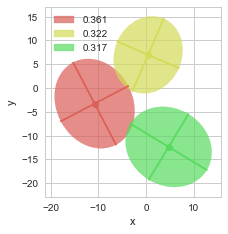

In [43]:
fig,ax = plt.subplots(figsize=(3.5,3.5))
plot_gmm_ellipses(gmm_em_result, ax=ax)

In [44]:
X = Y = PLOT_AXIS_RANGE
pdf_Z = generate_Z_from_X_Y(X,Y, lambda coords: exp(clf.score_samples(coords)))

def residule_between_kde_and_gmm(points):
    kde_vals = exp(kde.score_samples(points))
    gmm_vals = exp(clf.score_samples(points))
    return kde_vals - gmm_vals 

residual_Z = generate_Z_from_X_Y(X,Y, residule_between_kde_and_gmm)

plot_3d_prob_density(X,Y,pdf_Z)
plot_3d_prob_density(X,Y,residual_Z)
align_figures()

fig = plt.figure(figsize=(4,3))
plot_2d_prob_density(X,Y,kde_Z,xlabel='x',ylabel='y', colorbar_lim=colorbar_lim)
fig_em = plt.figure(figsize=(4,3))
plot_2d_prob_density(X,Y,pdf_Z,xlabel='x',ylabel='y', colorbar_lim=colorbar_lim)
fig = plt.figure(figsize=(4,3))
plot_2d_prob_density(X,Y,residual_Z,xlabel='x',ylabel='y')
align_figures()

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAATkAAAE5CAYAAADr4VfxAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJzsvXu0LHddJ/r51aOf++z365yzz9mPkwSFEUmMwBjFiJMV
JTLmGkkkDsoYvKgDKuKFjHNJ0GHx0DsIegN6RcYLLoUgDgqs63gJjFEY0SBRyM2DnNd+v3rv3Y/q
R71+94/qX+1fVVdVV1V37bN7n/qsdVayu/tXv+ruqk9/vm9CKaVIkSJFihMK4VqfQIoUKVIkiZTk
UqRIcaKRklyKFClONFKSS5EixYlGSnIpUqQ40UhJLkWKFCcaKcmlSJHiRCMluRQpUpxopCSXIkWK
E42U5FKkSHGikZJcihQpTjRSkkuRIsWJRkpyKVKkONFISS5FihQnGinJpUiR4kQjJbkUKVKcaKQk
lyJFihONlORSpEhxopGSXIoUKU40UpJLkSLFiUZKcilSpDjRSEkuRYoUJxopyaVIkeJEIyW5FClS
nGikJJciRYoTDelan0CKaw9KKVRVha7rEEURsixDEAQQQq71qaVI0TMIpZRe65NIce1gmiZ0XYdh
GNA0zX6cEIK9vT1MT08jk8mkpJdiYJEquesYiqKgVCphZmbGJjCeyHZ3dzE6OgpN00AIgSiKEAQh
VXopBgopyV2HoJRC13W0Wi3UajXMzMx4vs5NfIZh2OsEQYAoihBFEZIkpaSX4tgiJbnrDKZpQtM0
UEpjkRIhxJP0CCE22UmSBFEU+33qKVLEQkpy1wkopTAMA4ZhADhUZ726ZHmi1HUdlNKU9FIcK6Qk
dx2ABRdM03SQUjclRwiJTIJ+pMfM25T0Uhw1UpI74WAmpZ95mnRwnVeMLIp7+fJl3HjjjSnppTgS
pCR3QuFnnvK4FoECpg4Z6aVKL0XSSEnuBMLPPI2KOOZqnD0ApKSXIjGkJHfC0M085XEUJBYVKeml
6DdSkjshcKu3sAqOJ7njmOcWhvQymcyxPPcUxwMpyZ0AmKaJ9fV1GIaB2dnZ0OtOmtJrNBooFovI
5/Mp6aWwkZLcgINFLOMS0nEjsajgSW9rawvT09PQdd1RkSHLckp61zFSkhtQ8CkZcW/gk3jjM1Od
fT6apqHZbKakdx0jJbkBhFdwIQnT8jiaq1HhNm9T0rv+kJLcACEo9y1udcKgk1hUeJEe8+kx4ktJ
72QhJbkBQb9y344DkiLWOE0H2OtN07SbF/CkJ0kSJEka+M/8ekZKcgMAvqGl383Wq5Lzq4hIwgQ+
zvAiPU3TUK1WMTMzk5LeACIluWOMKMGF69H0PAoQQqDrOur1um3eEkJSpTdASEnumOIozNOUGKPD
S+mlpHe8kZLcMQOlFI1Gwy5bCnuzpNHVeD65Xo+bkt7xRzqS8BiBTc16+umnI69No6vHAzzp6bqO
RqOBarUKRVHQaDTs1J8UR4dUyR0TsNw30zQBJKdK/KCqKsrlMvL5fJpC4UIv34WX0gPgGAokimL6
eSeIlOSuMdy5b4Ig2I9HufB76eJbLpexvr6OfD6PUqkESikKhYId1c3lcpGOm8IfbtLb29tDo9HA
6dOn7aFAKen1FynJXUPEbUvuhTgkx1Tj5uYm5ufnIUkSKKXQNA31eh2KomBrawu7u7soFAooFArI
5/OQpON52VwLn1w/jk0ptUlPVVUA6JiPkZJefBzPq/U6QFDft6MotldVFSsrKwCApaUlyLJsm1KZ
TAaZTAaVSgWTk5MQRRH1eh2VSgVbW1uQJMlBeie9t1uSPjT3989PQjMMA6qqOmbepqQXHSnJHTHc
uW/9SsKNctFXKhWsra1hamrKEcn1O2Y2m0U2m8XY2BgopWg2m2g0Gjg4OMDGxgay2axNePl83ja5
TxKSVHJBx05Jr3ekJHeECJv7llSk1DRNbG1toVKpYH5+HoVCAdvb25H2IoTYZDY+Pg7TNNFsNlGv
11EqldBqtZDL5Wyll8vlBv4GTNpcjYKU9KIjJbkjAlNvQHKjAIPWMPNUkiRcuHChb341QRBsQgMs
Iq3X62g0Gtje3oamaTYpFgoFZDKZvuzrhUFNzeh1DgfgTXosX+9675ycklzCiNP3rd/5a7x5OjEx
Eal7SdTzEAQBQ0NDGBoaAmDdfPV6HfV6HRsbGzbRHxwcoFAo9D1dZRADD0m8f8Mw0Gw2sbm5iYWF
heta6aUklyDCFNZ7oV9KjlKKzc1Nh3ka9Zi9QhRFnDp1CqdOnQJgKcorV66g2Wxib28PAGyVx0jv
ekLS+ZA86em63mHeyrIMQRBONOmlJJcAWO7bU089hRtuuCGyadgPkgtrnh511QMjsdnZ2Y50ld3d
XYf5e1zSVZJWckkFavwit8D1RXrX/go6YeCDC+zvOOiFeILM06M8j24ghNjpKqOjo3ZZW9x0laOu
EukHrqUp3I30WHLyoJNeSnJ9hDv3La5KipsMbJomNjY2IpmnQed41Bc2IcQzXaVer3ekq7DI7VGk
qxyn6GoUmKYZ6fPxIj13q/hBJL2U5PoAZp7quu7IfRMEITbJRV2n67r9S9zP6Om1BJ+uAsCRrrK7
u9uRrjKI0dXjHNTgr2V2fbdaLRBCIEkSTNOELMuJRsz7gcG/E64xgnLfelFyUdYx81QQBJw/fz7y
hd3P6GqScKerGIaBRqNhp6tQSrGxsYFisWinq/SDQI4qONBvJBW5Bawf1fX1dRSLRYyMjNgKT9d1
5HK5Y1UFk5JcD+iW+5Y0ybFZo+VyGXNzc1hdXY18UYf12RxHiKLoSFd57rnnMDw8bFdjGIZhk2Iv
6SpHWdY1KMdmx2dkxtw06+vrmJ2dxejoaGL7RkVKcjEQNvctSZJzR0+PSjUeZxBCMDQ0hOHhYQCA
pmloNBqo1+t2ugofxIiSrjKIRHQUJOeO3kb1Ax4FUpKLCNYTLMwFlBTxeEVPmaI87jhKdSjLMmRZ
xvDwsCNdpVarYWdnx2H+FgoFXxPrKNM8BuXYgHdgI8nPKi5SkguJoJmnfug3yfHmqTt6mgShnjSV
1y1dRZZlOzH5qLqrJElESY+v9Dr3VMkNKOIOlekn8XRL7j1JhBQXURsN+KWr7O/vO9JVVFW1I7zX
8pzjHDtJwkmV3AlBs9nE1tYWZmZmYjn1+5EMXKlUsL6+jomJCUxOTgaeRxxlwPY6SqJMSsHEPSaf
rjIxMeFIV2H/VRQlke4qg1hNwY7vPveU5AYIzDzVNA3lchmzs7ORj9Frnhxvnp4/fz4wubeXm7vb
eVyP4P11hmHY+WD1eh1bW1vQdd1Rcxs3XWXQfXJe5upxSh8BUpLzBG+eCoIQW431Yq4ahoFLly5B
FMXQyb1sv37myaWw4O6uwiZxsWoM0zQ7Gg2E+R4GmeS8VFvqkxsAsMxu4DDjOy4JxF2raRoODg4w
NTXV1Tztdb9uxx4UAjzqXDZJkhzdVVjkljUPJYSESlcZVJJjlgZ/fN7tcZyQklwbfrlvR0lyzDxV
FAUjIyOYmpqKtW9UHJfa1X7gWp2zLMsYGRnByMhIR7rK9vY2RFH0TFcZZJLjy76A46nigJTkAATn
vvH+sTiBh7Akp6oqVldXIQgCxsbGYvk1elFy+/v72NzcdBTAD4qKSxpRv3uvdJVWq9WRrsL8fXHd
Id2QZArJoAQdgJTkQpVmxfV1hSWdarWKtbU1O3q6s7NzZNULlFLs7u5C0zScPXsWuq5DURRsbGzY
BdkAUCwWr7uGlv0CIQS5XM6eX8unq1BKsbKykkh3lSRJx0u1JZ2XFxfXLcmZpmkn916rygU+enru
3DkUi0V7XVK/7jxUVUWz2UQul8PS0hIoteZ/Muf65uYmKKVoNBoolUqhKwSuBQbJ7OPTVQ4ODnDu
3Dm7BI11V+G

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAARYAAADPCAYAAAAwC/4cAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJztnXtQU3f6/9/hhCgNUWpXFKugIqh45fKV/lrFqS2r7ayr
u1QwtHS6pdK1ra3VIvysittB0Lp2u6232XV2W9mxRfG7s3Wczu6qHam6ayU2VhGhjTXeBS/8mgQl
kJzfH/HEJJxrcnL/vGYyY3LO55MPYN55nufzfJ5HQdM0DQKBQJCRmGAvgEAgRB5EWAgEguwQYSEQ
CLJDhIVAIMgOERYCgSA7RFgIBILsKIO9AG/Q6XTBXgKB4CQ7O1v0vd/qD8JuS+C8rlKpMGnSJDmW
FVTCUlgAYHd1o9/mNplN0MRr/DZ/qEB+Tt8pXJUn6X67LQFDkms5r9+4+H99XVJIQFwhAoEgO0RY
CASC7BBhIRAIskOEhUAgyA4RFgKBIDtEWAgEguwQYSEQCLITtnksBEK0YbfbsXbtWrS2tkKlUqG6
uhopKSnO64cOHcKWLVugVCpRUFCAwsJCwTE1NTUYNWoUtFotAOCTTz7B/v37AQAzZ87EG2+8AZqm
kZeXh5EjRwIApk6diuXLl/OulQgLgRAmHDhwAFarFfX19dDr9Vi/fj22bdsGAOjp6UFtbS0aGhoQ
FxcHrVaLWbNm4eTJk6xjbt++jRUrVuDChQsoLS0FAFy6dAlffPEF9uzZg5iYGGi1Wjz99NOIi4vD
hAkTsH37dtFrJa4QgRAm6HQ6zJgxA4DDajhz5ozzmsFgQHJyMgYOHAiVSoXs7GycOHGCc4zFYsGS
JUswb9485xxDhw7Fjh07QFEUFAoFent70a9fPzQ3N+PGjRsoKSnBokWLcP78ecG1EmEhEMIEs9mM
+Ph453OKotDb2+u8ptE8OLagVqthNps5x4wYMQJTpkxxmz82NhaDBg0CTdPYsGEDMjIyMGrUKAwe
PBhlZWWoq6vDq6++ivLycsG1EleIQAgT4uPjYbFYnM/tdjuUSiXrNYvFAo1GwzuGje7ubqxcuRJq
tRpVVVUAgIkTJ4KiKABATk4O2tvbQdM0FAoF5zzEYiEQwoSsrCw0NjoO3+r1eqSnpzuvpaamwmg0
orOzE1arFU1NTcjMzOQd4wlN03jttdcwduxYvPfee04x2bx5Mz799FMAwLlz55CUlMQrKgCxWAiE
sCE/Px9Hjx7FwoULQdM0ampqsG/fPnR1daGoqAiVlZUoLS0FTdMoKCjAkCFDWMdwceDAAXzzzTew
Wq34+uuvAQDLli1DWVkZysvLcfjwYVAUhdpa7tPZDIpwbP+h0+lI2QQZID+n7xSuypNUj0Wn0wmW
TZAyX6hCLBaCV7Tdvst5LX1QXABXEn503Psh2EvwO0RYCKLwFJLUSSNY7zOcvuS8lwgMO+fppziv
jQzcMvwKERYCK2wWCZeYsN3DCAwRl+gkoMLS09ODlStX4sqVK7BarVi8eDHGjBmDyspKKBQKpKWl
oaqqCjExZLPKH3iKhc2mAGXldmnECAnfWCIu0UtAheWLL75AQkICNm7ciM7OTsyfPx/jxo3D0qVL
kZubizVr1uDgwYPIz88P5LLCFr44BxueQmEymdySquSGeb+205eIuEQZARWWOXPmYPbs2QAce+YU
RaG5uRnTpk0DAOTl5eHo0aNEWHgQG+sINYjlEl0EVFjUajUAR/rxm2++iaVLl2LDhg3OZBu1Wg2T
ySRqLpNZ3H3e4u/5pXD5rnsyUlLqI85/i/19ceHreDEkjkzANcMttHSYMTwuONkNofT3jAYCHry9
du0aXn/9dRQXF2Pu3LnYuHGj85rFYsGAAQNEzePP/ItQye9grBOK8o9l4m9XyBXNVA0Mpy9BEx94
qyVU/p7RRECjpDdv3sTLL7+M8vJyPPfccwCAjIwMHD9+HADQ2NiInJycQC4pZGFEJXXSiLBxd8Qg
NS5ECE8CarFs374dP/30E7Zu3YqtW7cCAN59911UV1fjgw8+wOjRo50xmGjFVVAiDWaniBD5BFRY
Vq1ahVWrVvV5/W9/+1sglxGSuH6TR6KoEKILkiAXAgTaSjltugMA6LXZoDT1+jTXJM3Dku5PnTSC
bD9HAURYgow/RYUREE9S04YCkCd4e/r76wCkCwwhsiHCEiT8IShsQsKIiL9g5icCQ3CFCEsQkFNU
PMXE30LCRWraUBi+v47TpjtEXAhEWAKNHKLiKibBEhI2GHEhEIiwBBBfREVuMTll6YCNtoGy3BM9
Zop6sOA9qWlDcfr767xWCwngRj5EWAJAKAjKKUtHn9eGJ8aLzkhtM7a7zSEkMsQlim6IsPgZOUTF
G0HxFJL0lMQ+90g5P+M6nhEZLnEhLhE/582XOa+NDNwy/AoRFj/irah4KyhixEQOmHlPGdsBiHOR
CA/otD0e7CX4HSIsfiKQouIqKP4SEzbSUxJ5rRfiDkUvRFj8QCBERQ4xaVOaQPV0Cd43NXYI5zVG
XDwh7lB0Q4RFZrwRlUAJir7nhtvzlIR4wczblqvtznF8AsMXcyHIg91ux9q1a9Ha2gqVSoXq6mqk
pKQ4rx86dAhbtmyBUqlEQUEBCgsLBcfU1NRg1KhR0Gq1AIDdu3fj888/h1KpxOLFi/Hkk0/i3r17
KC8vx61bt6BWq7FhwwYMGjSId61EWGTEn6LiraC4isn4Ye7jxBR5ch2jv8ouMFxWC0FeDhw4AKvV
ivr6euj1eqxfvx7btm0D4KgnXVtbi4aGBsTFxUGr1WLWrFk4efIk65jbt29jxYoVuHDhAkpLSwEA
HR0dqKurw969e9Hd3Y3i4mI88cQT+Oyzz5Ceno4lS5Zg//792Lp1K+thYleIsMiAv10fRlTECgqf
mPjC+GGJTguGz3oRCylXKQ2dTocZM2YAAKZOnYozZ844rxkMBiQnJ2PgwIEAgOzsbJw4cQJ6vZ51
jMViwZIlS5ztVwHgu+++Q2ZmJlQqFVQqFZKTk3Hu3DnodDq88sorABzlY5mSJ3yQcvg+0Hb7bsiI
ir7nhvMBOERATlFhYOb0dKuAvrtSqWlDuQ9CktIQkjGbzYiPj3c+pygKvb29zmuubq1arYbZbOYc
M2LECEyZMqXP/FxzMK+LLR9LLBYv8KV2ij8EhcEfQsIGY7m4Qtwh/xMfHw+LxeJ8brfboVQqWa9Z
LBZoNBreMULzs80htnwsERYJ+FqMSU5R8UVQWumLAIDe/jYoaXaLgmGsIlnS3FIh7pB4srKy8NVX
X+HZZ5+FXq9Henq681pqaiqMRiM6Ozvx0EMPoampCaWlpVAoFJxjPJk8eTI+/PBDdHd3w2q1wmAw
ID09HVlZWTh8+DAmT56MxsZGUb2libAIIEdlNylp+UKi4o2gMELCkDHYMU6oHsvZjnbnWE+BGT8s
EfqrvsVaSKlKaeTn5+Po0aNYuHAhaJpGTU0N9u3bh66uLhQVFaGyshKlpaWgaRoFBQUYMmQI6xgu
Bg8ejJKSEhQXF4Omabz99tvo168ftFotKioqoNVqERsbi02bNgmuVUHTdHD6MfiATqfD7upG4Ru9
xGQ24Zr1gebKcRJZjl0f1/iJGFwFhRETV8QWejrb4XBxPMWl5Wq7m7C0sWTiGgQOJDLC4k+rxZ9V
+gtX5Yn6BmfQ6XT4X9URzuu/tk6XNF+oQiwWD9pu33W0HvWx5YacVgogXlS4rBNfyBic6BQXPtji
LEKnnYnVEpkQYXGBcXuSUh/xqWRjMKwUIevEVxzictHNapHDHWIgsZbIIijbzadOnUJJSQkAwGg0
QqvVori4GFVVVbDb7cFYkmxV3bwJ0PoiKq30RaeoZAxO9EpULDEtsMS0SB4nF84ez6TnUMQQcGH5
85//jFWrVqG

## Goodness-of-fit Statistics

In [45]:
points = FITTING_RANGE
gmm_pdf_result = exp(clf.score_samples(points))
gof_df(gmm_pdf_result, kde_result)

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.974  0.013      0.023  2.760911e-09      0.041       0.175

# 5. GMM by Optimization

In [46]:
sample = SPEED_SET
points = FITTING_RANGE
max_speed = df.speed.max()
print(FIT_METHOD)

square_error


In [47]:
# from GMM,EM 
# GMM format: weight, meanx, meany, sigx, sigy, rho
x0 = gmm_em_result

cons = [
        # sum of every 6th element, which is the fraction of each gaussian
        {'type': 'eq', 'fun': lambda x: sum(x[::6]) - 1},
        # # limit the width/height ratio of elliplse, optional
#         {'type': 'ineq', 'fun': lambda x: width_height_ratios_set(x) - 1/3},
#         {'type': 'ineq', 'fun': lambda x: 3 - width_height_ratios_set(x)},
]

bonds = [(0., 0.99),(-fit_limit, fit_limit),(-fit_limit, fit_limit),
         (0., fit_limit),(0., fit_limit),(-0.99, 0.99)]*(len(x0)//6)

result = sp.optimize.minimize(
    lambda x0: GMM_fit_score(x0, kde_result, points, FIT_METHOD),
    x0,
    bounds = bonds,
    constraints=cons,
    tol = 0.000000000001,
    options = {"maxiter": 500})
result

     fun: -19.984362385009224
     jac: array([  1.98858094e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         1.98858166e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,  -2.38418579e-07,  -4.76837158e-07,
         1.98858404e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00])
 message: 'Optimization terminated successfully.'
    nfev: 1550
     nit: 77
    njev: 77
  status: 0
 success: True
       x: array([  0.20740818,   1.99352608,   8.94785476,   6.74239912,
         6.83496636,  -0.10151275,   0.67626601,  -6.25223139,
        -4.4997417 ,   9.91133146,  10.23871704,  -0.22204957,
         0.11632581,  10.31223104, -12.85036023,   6.95876045,
         6.36987633,  -0.33173421])

## 5.1 GMM Result

In [48]:
gmm = group_gmm_param_from_gmm_param_array(result.x, sort_group = True)
mixed_model_pdf = generate_gmm_pdf_from_grouped_gmm_param(gmm)
gmm_pdf_result = mixed_model_pdf(points)
pretty_print_gmm(gmm)

weight  mean_x   mean_y  sig_x   sig_y    corr
1  0.676  -6.252   -4.500  9.911  10.239  -0.222
2  0.207   1.994    8.948  6.742   6.835  -0.102
3  0.116  10.312  -12.850  6.959   6.370  -0.332

GMM Plot Result
0.676266006279 [[-6.25223139 -4.4997417 ]] [  8.87464592  11.14928149] -139.163872287
0.207408180418 [[ 1.99352608  8.94785476]] [ 6.43181285  7.12800775] -138.825357654
0.116325813303 [[ 10.31223104 -12.85036023]] [ 5.41114953  7.72781549] -127.528316444


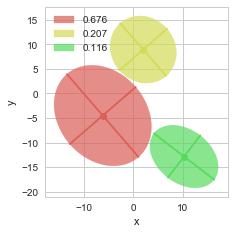

In [49]:
fig_gmm, ax = plt.subplots(figsize=(3.5,3.5))
plot_gmm_ellipses(gmm,ax=ax)
# fig_gmm.savefig('foo.pdf')

## 5.2 Goodness-of-fit statistics

In [50]:
gof_df(gmm_pdf_result, kde_result)

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.981  0.015      0.056  2.093638e-09      0.035       0.152

In [51]:
X = Y = PLOT_AXIS_RANGE
pdf_Z = generate_Z_from_X_Y(X,Y, mixed_model_pdf)# passing a function as an argument

def residule_between_kde_and_gmm(points):
    kde_vals = exp(kde.score_samples(points))
    gmm_vals = mixed_model_pdf(points)
    return kde_vals - gmm_vals 

residual_Z = generate_Z_from_X_Y(X,Y, residule_between_kde_and_gmm)

plot_3d_prob_density(X,Y,pdf_Z)
plot_3d_prob_density(X,Y,residual_Z)
align_figures()

fig = plt.figure(figsize=(4,3))
plot_2d_prob_density(X,Y,kde_Z,xlabel='x',ylabel='y')
fig_gmm = plt.figure(figsize=(4,3))
plot_2d_prob_density(X,Y,pdf_Z,xlabel='x',ylabel='y')
fig = plt.figure(figsize=(4,3))
plot_2d_prob_density(X,Y,residual_Z,xlabel='x',ylabel='y')
align_figures()

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAATkAAAE5CAYAAADr4VfxAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJzsvXmYLGldJvp+seVWVVnrqTpVdbaqbris0t0MIChgIy4s
2gq2LNfr1UZAR64gjHKdwRbGyyJ3kFHAZbB1xAVQ5zIC93G4INoKzyCguLTddPfZal+zcotcYvvu
H5FfVERkRGREZEZWZZ14+zlPV1XmF19kZsSb728nlFKKFClSpDij4E76BFKkSJEiSaQklyJFijON
lORSpEhxppGSXIoUKc40UpJLkSLFmUZKcilSpDjTSEkuRYoUZxopyaVIkeJMIyW5FClSnGmkJJci
RYozjZTkUqRIcaaRklyKFCnONFKSS5EixZlGSnIpUqQ400hJLkWKFGcaKcmlSJHiTCMluRQpUpxp
pCSXIkWKM42U5FKkSHGmkZJcihQpzjRSkkuRIsWZRkpyKVKkONNISS5FihRnGinJpUiR4kwjJbkU
KVKcaQgnfQIpTh6UUiiKAk3TwPM8RFEEx3EghJz0qaVI0TcIpZSe9EmkODkYhgFN06DrOlRVtf5O
CEGpVMK5c+cgSVJKeilGFqmSu4UhyzIODw8xPz9vEZidyA4ODjA5OQlVVUEIAc/z4DguVXopRgop
yd2CoJRC0zS0223U63XMz897Ps9NfLquW+s4jgPP8+B5HoIgpKSX4tQiJblbDIZhQFVVUEpjkRIh
xJP0CCEW2QmCAJ7nB33qKVLEQkpytwgopdB1HbquAzhWZ/26ZO1EqWkaKKUp6aU4VUhJ7hYACy4Y
huEgpV5KjhASmQT9SI+ZtynppRg2UpI742AmpZ95mnRw3a4YWRT3+vXruP3221PSSzEUpCR3RuFn
ntpxEoECpg4Z6aVKL0XSSEnuDMLPPI2KOOZqnD0ApKSXIjGkJHfG0Ms8tWMYJBYVKemlGDRSkjsj
cKu3sArOTnKnMc8tDOlJknQqzz3F6UBKcmcAhmFga2sLuq5jYWEh9LqzpvSazSYKhQJyuVxKeiks
pCQ34mARy7iEdNpILCrspLe7u4tz585B0zRHRYYoiinp3cJISW5EYU/JiHsDn8Ubn5nq7P1RVRWt
VislvVsYKcmNILyCC0mYlqfRXI0Kt3mbkt6th5TkRghBuW9xqxNGncSiwov0mE+PEV9KemcLKcmN
CAaV+3YakBSxxmk6wJ5vGIbVvMBOeoIgQBCEkX/Pb2WkJDcCsDe09LvZ+lVyfhURSZjApxlepKeq
Kmq1Gubn51PSG0GkJHeKESW4cCuansMAIQSapqHRaFjmLSEkVXojhJTkTimGYZ6mxBgdXkovJb3T
jZTkThkopWg2m1bZUtibJY2uxvPJ9XvclPROP9KRhKcIbGrWww8/HHltvz65ZrOJw8NDNBoNGIYR
ef8UJuykp2kams0marUaZFlGs9m0Un9SDA+pkjslYLlvjGCSUiVeKJVK2N3dxdjYGPb396EoCnK5
nNXaPJPJ3NJKpJ/PwkvpAXAMBeJ5/pZ+f5NGSnInDHfuG8dx1t+jXPhxlBwj1FKphJWVFcfshmaz
id3dXRweHmJ/fx+5XA75fB75fD4tiO8DbtIrlUpoNps4f/68NRQoJb3BIiW5E0TctuReiEpyzWYT
6+vrAIArV66A53koigLAVBljY2MolUqYm5uDKIpoNBpoNBool8swDAP5fN4ivtOSPHsSPrlBHJtS
apEe+wzc8zFOw/s7qkhJ7oQQ1PctyWJ7SimOjo6wu7uL8+fPY3Nzs2dpmCAImJiYwMTEBABAVVWL
9A4PD0EIsVRePp+HIJytyypJH5r787eraV3XoSiKY+ZtSnrRcbauxhGAO/dtUEm4YS56XdextbWF
druNlZUVZDIZbG5uBh7T6zxEUUSxWESxWLSCJc1mE/V6HXt7exAEwWHenoUGl0kquaBjp6TXP1KS
GyLC5r4lUYfKzNOxsTGsrKxYvr9+00QIIchkMshkMpicnLT6uzUaDVQqFezu7kIURYvwstls7L1O
Ckmbq1GQkl50pCQ3JDD1BiQ3CtBrjds8nZycjHTcqCCEIJvNIpvNYnp6GpRStFotNBoNlEoltFot
AMDBwYFFeoxw+8Wopmb0O4cD8CY9lq93qweKUpJLGHH6vg0qCdfLPI261yCGT+dyOeRyOczMzEDX
dVy9ehWUUhwcHKDdblumbS6XQzabHchNP0gkreQGeWw76bVaLezs7ODy5cu3tNJLSS5BhCms98Ig
lJyfeRr1mIMGO4+5uTkAx+kqjUYDu7u70DTtlkpXSTof0k56mqZ1mbeiKILjuDP9HqcklwBY7ttD
Dz2E2267LXK0sR+So5SiVCphb28vlHl60qVbLF1lbGwMAKwqgdOUrpK0khuUue51bL/UpFuJ9FKS
GzDswQX2exzETSFZX1+Hoii+5ukwzqMfCIKA8fFxjI+PAwhOV8nlchBF0XGuo3ZznqQp3Iv0WHLy
qJNeSnIDhDv3La5KinNBtdttqKqK8fFxLC8vh1YHQed4Gi5sd7oKIz2WrsLzvEV6p6kZZ5RjJwXD
MCKpRC/Sc7eKH0XSS0luAGDmqaZpjtw3juNik1zYdXbzlOM4LC4uRt5vVEAIgSRJkCSpK12lWq1a
SpaNJczn84mZgoPCaQ5q2K9ldn23220QQiAIAgzDgCiKkCRpUKecCFKS6xNBuW/9KLkw63Rdx+bm
JhRFwcWLF60yrahIMrqaJOzpKgDw2GOPYW5uDq1WC0dHR9je3kYmk3Hk6MUhvWEFBwaNpCK3gOk7
3draQqFQQLFYtBSepmnIZrOnKgE8Jbk+0Cv3LUmSs0dPl5eXYRjGwE3jUTJJGHK5HAqFAmZmZmAY
hpWjZ09XYSovbLrKMMu6RuXY7PiMzJibZmtrCwsLC4nnY0ZBSnIxEDb3LQmSs5uni4uLKBaL1t+T
No1HDRzHWSoO6C9dZRSJaBgk547eRvUDDgMpyUUE6wkW5gIaNMnZzdNBRU+HjZNUh2HSVeykx9JV
hpnmMSrHBrwDG0m+V3GRklxIBM089cMgSc5tnrovpCRU41lWeYB/ukqz2USpVAIA5PN5aJqW2BdK
kkSU9PhKr3NPldyIIu5QmUEQj595Oqi9zhL6ff1+6SpHR0dWlxV7jt4gWkol7e9LknBSJXdG0Gq1
sLu7i/n5+cjfisxHEQdMOUY1T+MoA3ajDZMok1IwgzqmPV1FURQIgoBCoWClq7DuKva627gRxVGs
pmDHd597SnIjBEYyqqqiUqlgYWEh8jH6yZNTFAVXr171NU+91sRBEoGTswZ247KWUlNTU47uKv2k
q4y6T87LXD1N6SNASnKesJunHMfFVmNxSIIluLZaLSwtLfmap0H7xVVyKcLD3V3FK10lm806SM/r
cxllkvNSbalPbgTAMruB44zvuCQQdS0zT9vtNqanpyMRXJz92JogjAoBnnQuW1C6yt7eHlRVdZi2
bALaqJIcS1myH9/u9jhNSEmuA7/ct2GRnD16Ojk5OVTJTylFvV7H7u4uJEmybtbTdrGGwWk5Z3e6
iq7rjmFAuq5bkVtN0xJpKTUMArUf/zSqOCAlOQDBuW/2FkZxAg+9SM4rerq7uzvUxN5yuYx6vY65
uTnLB7mzswOO46CqKiRJGmgH31HDIMiC5/mudJVmswlZlrGzs2OZv/YcvX6RZArJqAQdgJTkQpVm
xTUrepGOX/Q06ZpX+/7tdhu6rmN1dRWAeaFOT0/DMAxsb2+D0u4Ovvl8/pYfON0vRFGEKIo4ODjA
8vIyAKDRaECWZRwcHDjM37jpKkmSjpdqSzovLy5uWZIzDMNK7h125QIQnNzbT+pJWDSbTaytrYHj
OMzPz0MURav

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAARYAAADPCAYAAAAwC/4cAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJztnXtQU3f6/9/hhCgNUWpXFKugIqh45fKV/lrFqS2r7ayr
u1QwtHS6pdK1ra3VIvysittB0Lp2u6232XV2W9mxRfG7s3Wczu6qHam6ayU2VhGhjTXeBS/8mgQl
kJzfH/HEJJxrcnL/vGYyY3LO55MPYN55nufzfJ5HQdM0DQKBQJCRmGAvgEAgRB5EWAgEguwQYSEQ
CLJDhIVAIMgOERYCgSA7RFgIBILsKIO9AG/Q6XTBXgKB4CQ7O1v0vd/qD8JuS+C8rlKpMGnSJDmW
FVTCUlgAYHd1o9/mNplN0MRr/DZ/qEB+Tt8pXJUn6X67LQFDkms5r9+4+H99XVJIQFwhAoEgO0RY
CASC7BBhIRAIskOEhUAgyA4RFgKBIDtEWAgEguwQYSEQCLITtnksBEK0YbfbsXbtWrS2tkKlUqG6
uhopKSnO64cOHcKWLVugVCpRUFCAwsJCwTE1NTUYNWoUtFotAOCTTz7B/v37AQAzZ87EG2+8AZqm
kZeXh5EjRwIApk6diuXLl/OulQgLgRAmHDhwAFarFfX19dDr9Vi/fj22bdsGAOjp6UFtbS0aGhoQ
FxcHrVaLWbNm4eTJk6xjbt++jRUrVuDChQsoLS0FAFy6dAlffPEF9uzZg5iYGGi1Wjz99NOIi4vD
hAkTsH37dtFrJa4QgRAm6HQ6zJgxA4DDajhz5ozzmsFgQHJyMgYOHAiVSoXs7GycOHGCc4zFYsGS
JUswb9485xxDhw7Fjh07QFEUFAoFent70a9fPzQ3N+PGjRsoKSnBokWLcP78ecG1EmEhEMIEs9mM
+Ph453OKotDb2+u8ptE8OLagVqthNps5x4wYMQJTpkxxmz82NhaDBg0CTdPYsGEDMjIyMGrUKAwe
PBhlZWWoq6vDq6++ivLycsG1EleIQAgT4uPjYbFYnM/tdjuUSiXrNYvFAo1GwzuGje7ubqxcuRJq
tRpVVVUAgIkTJ4KiKABATk4O2tvbQdM0FAoF5zzEYiEQwoSsrCw0NjoO3+r1eqSnpzuvpaamwmg0
orOzE1arFU1NTcjMzOQd4wlN03jttdcwduxYvPfee04x2bx5Mz799FMAwLlz55CUlMQrKgCxWAiE
sCE/Px9Hjx7FwoULQdM0ampqsG/fPnR1daGoqAiVlZUoLS0FTdMoKCjAkCFDWMdwceDAAXzzzTew
Wq34+uuvAQDLli1DWVkZysvLcfjwYVAUhdpa7tPZDIpwbP+h0+lI2QQZID+n7xSuypNUj0Wn0wmW
TZAyX6hCLBaCV7Tdvst5LX1QXABXEn503Psh2EvwO0RYCKLwFJLUSSNY7zOcvuS8lwgMO+fppziv
jQzcMvwKERYCK2wWCZeYsN3DCAwRl+gkoMLS09ODlStX4sqVK7BarVi8eDHGjBmDyspKKBQKpKWl
oaqqCjExZLPKH3iKhc2mAGXldmnECAnfWCIu0UtAheWLL75AQkICNm7ciM7OTsyfPx/jxo3D0qVL
kZubizVr1uDgwYPIz88P5LLCFr44BxueQmEymdySquSGeb+205eIuEQZARWWOXPmYPbs2QAce+YU
RaG5uRnTpk0DAOTl5eHo0aNEWHgQG+sINYjlEl0EVFjUajUAR/rxm2++iaVLl2LDhg3OZBu1Wg2T
ySRqLpNZ3H3e4u/5pXD5rnsyUlLqI85/i/19ceHreDEkjkzANcMttHSYMTwuONkNofT3jAYCHry9
du0aXn/9dRQXF2Pu3LnYuHGj85rFYsGAAQNEzePP/ItQye9grBOK8o9l4m9XyBXNVA0Mpy9BEx94
qyVU/p7RRECjpDdv3sTLL7+M8vJyPPfccwCAjIwMHD9+HADQ2NiInJycQC4pZGFEJXXSiLBxd8Qg
NS5ECE8CarFs374dP/30E7Zu3YqtW7cCAN59911UV1fjgw8+wOjRo50xmGjFVVAiDWaniBD5BFRY
Vq1ahVWrVvV5/W9/+1sglxGSuH6TR6KoEKILkiAXAgTaSjltugMA6LXZoDT1+jTXJM3Dku5PnTSC
bD9HAURYgow/RYUREE9S04YCkCd4e/r76wCkCwwhsiHCEiT8IShsQsKIiL9g5icCQ3CFCEsQkFNU
PMXE30LCRWraUBi+v47TpjtEXAhEWAKNHKLiKibBEhI2GHEhEIiwBBBfREVuMTll6YCNtoGy3BM9
Zop6sOA9qWlDcfr767xWCwngRj5EWAJAKAjKKUtHn9eGJ8aLzkhtM7a7zSEkMsQlim6IsPgZOUTF
G0HxFJL0lMQ+90g5P+M6nhEZLnEhLhE/582XOa+NDNwy/AoRFj/irah4KyhixEQOmHlPGdsBiHOR
CA/otD0e7CX4HSIsfiKQouIqKP4SEzbSUxJ5rRfiDkUvRFj8QCBERQ4xaVOaQPV0Cd43NXYI5zVG
XDwh7lB0Q4RFZrwRlUAJir7nhtvzlIR4wczblqvtznF8AsMXcyHIg91ux9q1a9Ha2gqVSoXq6mqk
pKQ4rx86dAhbtmyBUqlEQUEBCgsLBcfU1NRg1KhR0Gq1AIDdu3fj888/h1KpxOLFi/Hkk0/i3r17
KC8vx61bt6BWq7FhwwYMGjSId61EWGTEn6LiraC4isn4Ye7jxBR5ch2jv8ouMFxWC0FeDhw4AKvV
ivr6euj1eqxfvx7btm0D4KgnXVtbi4aGBsTFxUGr1WLWrFk4efIk65jbt29jxYoVuHDhAkpLSwEA
HR0dqKurw969e9Hd3Y3i4mI88cQT+Oyzz5Ceno4lS5Zg//792Lp1K+thYleIsMiAv10fRlTECgqf
mPjC+GGJTguGz3oRCylXKQ2dTocZM2YAAKZOnYozZ844rxkMBiQnJ2PgwIEAgOzsbJw4cQJ6vZ51
jMViwZIlS5ztVwHgu+++Q2ZmJlQqFVQqFZKTk3Hu3DnodDq88sorABzlY5mSJ3yQcvg+0Hb7bsiI
ir7nhvMBOERATlFhYOb0dKuAvrtSqWlDuQ9CktIQkjGbzYiPj3c+pygKvb29zmuubq1arYbZbOYc
M2LECEyZMqXP/FxzMK+LLR9LLBYv8KV2ij8EhcEfQsIGY7m4Qtwh/xMfHw+LxeJ8brfboVQqWa9Z
LBZoNBreMULzs80htnwsERYJ+FqMSU5R8UVQWumLAIDe/jYoaXaLgmGsIlnS3FIh7pB4srKy8NVX
X+HZZ5+FXq9Henq681pqaiqMRiM6Ozvx0EMPoampCaWlpVAoFJxjPJk8eTI+/PBDdHd3w2q1wmAw
ID09HVlZWTh8+DAmT56MxsZGUb2libAIIEdlNylp+UKi4o2gMELCkDHYMU6oHsvZjnbnWE+BGT8s
EfqrvsVaSKlKaeTn5+Po0aNYuHAhaJpGTU0N9u3bh66uLhQVFaGyshKlpaWgaRoFBQUYMmQI6xgu
Bg8ejJKSEhQXF4Omabz99tvo168ftFotKioqoNVqERsbi02bNgmuVUHTdHD6MfiATqfD7upG4Ru9
xGQ24Zr1gebKcRJZjl0f1/iJGFwFhRETV8QWejrb4XBxPMWl5Wq7m7C0sWTiGgQOJDLC4k+rxZ9V
+gtX5Yn6BmfQ6XT4X9URzuu/tk6XNF+oQiwWD9pu33W0HvWx5YacVgogXlS4rBNfyBic6BQXPtji
LEKnnYnVEpkQYXGBcXuSUh/xqWRjMKwUIevEVxzictHNapHDHWIgsZbIIijbzadOnUJJSQkAwGg0
QqvVori4GFVVVbDb7cFYkmxV3bwJ0PoiKq30RaeoZAxO9EpULDEtsMS0SB4nF84ez6TnUMQQcGH5
85//jFWrVqG

In [52]:
def f(V,theta):
    return (mixed_model_pdf([[V*cos(theta),V*sin(theta)]]))*V

/Users/cqcn1991/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:6: RuntimeWarning: divide by zero encountered in log
/Users/cqcn1991/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:11: RuntimeWarning: divide by zero encountered in log
/Users/cqcn1991/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:16: RuntimeWarning: divide by zero encountered in log


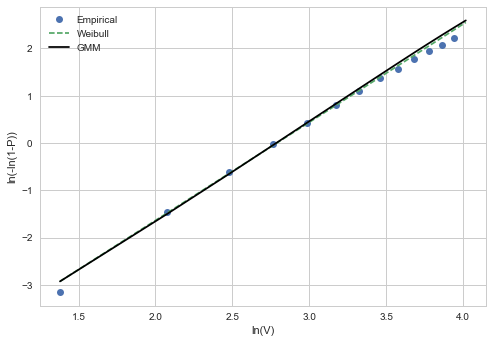

In [53]:
x = linspace(0, max_speed, 15)

# 1. Plot v-p points, empirical distribution
ecdf = sm.distributions.ECDF(df.speed)
y = ecdf(x)
plot(log(x), log(-log(1-y)),'o', label = 'Empirical')

# 2. Weibull distribution
weibull_params = sp.stats.exponweib.fit(df.speed, floc=0, f0=1)
y_cdf_weibull = sp.stats.exponweib.cdf(x, *weibull_params)
plot(log(x), log(-log(1-y_cdf_weibull)),'--', label = 'Weibull')

# 3. GMM distribution
y_ = [integrate.nquad(f, [[0, x_val],[0, 2*pi]]) for x_val in x]
y = array(list(zip(*y_))[0])
plot(log(x), log(-log(1-y)),'-', color='black', label = 'GMM')

plt_configure(xlabel='ln(V)',ylabel='ln(-ln(1-P))',legend={'loc':'best'})

Direction Distribution Comparison


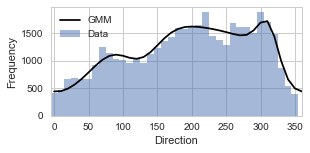

In [54]:
# Calculate Angle Distribution
x = linspace(0,2*pi, num=36+1)
y_ =[integrate.nquad(f, [[0, inf],[x_-pi/36, x_+pi/36]]) for x_ in x]

# 1. integrate.nquad returns 2 vaule, result, abserr. Need to abstract the first to plot
# 2. * length of data size, to adjust the plot space
y = array(list(zip(*y_))[0])*len(df['dir']) 

df['dir'].hist(bins=DIR_BIN, alpha=0.5, label='Data')
plot(x/pi*180, y,'-', color='black', label='GMM')
title='Direction Distribution Comparison'
plt_configure(xlabel='Direction',ylabel='Frequency', 
              legend={'loc': 'best'} ,tight='xtight',figsize = (4.5,2))
dir_fig = plt.gcf()
print(title)

Speed Distribution Comparison


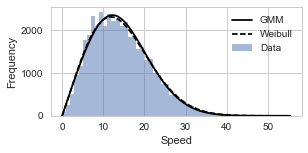

In [55]:
# Calculate Speed Distribution
# 1. GMM Model
x = arange(0, max_speed, 0.5)
y_ =[integrate.nquad(f, [[x_-0.01, x_+0.01],[0, 2*pi]]) for x_ in x]
y = array(list(zip(*y_))[0])*len(df.speed)/0.02
plot(x, y,'-', color='black', label='GMM')

# 2. Observation
df['speed'].hist(bins=arange(0, df.speed.max()), alpha=0.5, label='Data')

# 3. Weibull
y_weibul = sp.stats.exponweib.pdf(x, *weibull_params)* len(df.speed)
plot(x, y_weibul, '--', color='black', label='Weibull')   
title='Speed Distribution Comparison'
plt_configure(xlabel='Speed',ylabel='Frequency',legend=True, figsize=(4.5, 2))
plt.gca().set_ylim(bottom = 0)
plt.locator_params(axis='y', nbins=5)
print(title)

In [56]:
# %%time
incre = SECTOR_LENGTH 
density_collection=Parallel(n_jobs=-1)(delayed(direction_compare)(gmm, df, angle, incre) 
                                        for angle in arange(0, 360, incre))  
# #This R square is compute as in paper 
# # Comparison of bivariate distribution constructionapproaches for analysing wind speed anddirection data
# # http://onlinelibrary.wiley.com/doi/10.1002/we.400/full
print(true_R_square(density_collection))

0.8997579134


## 5.3 Sectoral Comaprison

In [57]:
# Calculate Speed Distribution
def model_data_comparison(df, original_incre = 10, incre = 10):
    start, end = -original_incre/2 + incre/2, 360
    max_diff_array = []
    curve_collection = []
    max_speed = df.speed.max()
    
    # Find a max count for plotting histogram
    max_count = max_count_for_angles(df, start, end, incre)
    plot_range = [0, max_speed, 0, max_count*1.05]
    
    for angle in arange(start, end, incre):
        angle_radian, incre_radian = radians(angle), radians(incre)  
        start_angle, end_angle = angle-incre/2, angle+incre/2
        
        # Select data from observation
        sub_df, sub_max_speed = select_df_by_angle(df, start_angle, end_angle)
        data_size = len(sub_df.speed)
        direction_prob = integrate.nquad(f, [[0, inf],
                                             [angle_radian-incre_radian/2, angle_radian+incre_radian/2]])
        weibull_params = sp.stats.exponweib.fit(sub_df.speed, floc=0, f0=1)
        
        fig = plt.figure(figsize=(13,1.3))
        x = linspace(0, sub_max_speed, 20)
        # 1. Frequency Comparison
        ax1 = fig.add_subplot(1,3,1)        
        # 1.1. Data Histogram
        sub_df['speed'].hist(bins=arange(0, sub_max_speed), alpha=0.5, label='Data')             
        # 1.2. Model Distribution
        y_gmm_ =[integrate.nquad(f, [[x_-0.01, x_+0.01], 
                                     [angle_radian-incre_radian/2, angle_radian+incre_radian/2]]) 
                                 for x_ in x]
        y_gmm = array(list(zip(*y_gmm_))[0])/direction_prob[0]/0.02
        plot(x, y_gmm*data_size,'-', color='black', label='GMM')
        # 1.3 Weibull Distribution
        y_weibull = sp.stats.exponweib.pdf(x, *weibull_params)
        plot(x, y_weibull*data_size, '--', color='black',label='Weibull')   
        plt_configure(xlabel = "V", ylabel='Frequency', legend=True)
        plt.axis(plot_range)
        
        # 2. CDF Comaprison
        ax2 = fig.add_subplot(1,3,2)
        # 2.1. Empirical distribution
        ecdf = sm.distributions.ECDF(sub_df.speed)
        y_ecdf = ecdf(x)
        # 2.2. Model
        y_ =[integrate.nquad(f, [[0, x_val],[angle_radian-incre_radian/2, angle_radian+incre_radian/2]]) 
             for x_val in x]
        y_cdf_gmm = array(list(zip(*y_))[0])/direction_prob[0]
        # 2.3 Weibull
        y_cdf_weibull = sp.stats.exponweib.cdf(x, *weibull_params)      
        plot(x, y_ecdf,'o', alpha=0.8, label='Data')
        plot(x, y_cdf_gmm,'-', color='black',label='GMM')
        plot(x, y_cdf_weibull,'--', color='black',label='Weibull')
        plt.gca().set_xlim(right = max_speed)
        plt_configure(xlabel = "V", ylabel='P', legend=True)
        
        # 3. Weibull Comparison
        ax3 = fig.add_subplot(1,3,3)
        plot(log(x), log(-log(1-y_ecdf)),'o', alpha=0.8, label='Data')
        plot(log(x), log(-log(1-y_cdf_gmm)),'-', color='black', label='GMM')
        plot(log(x), log(-log(1-y_cdf_weibull)),'--',color='black',label='Weibull')
        plt_configure(xlabel="ln(V)", ylabel="ln(-ln(1-P)",legend={'loc':'best'})
        plt.gca().set_xlim(right = log(max_speed+1))
        
        print('%s (%s - %s) degree' % (angle, start_angle, end_angle)     )

        bins = arange(0, sub_df.speed.max()+1)
        density, _ = np.histogram(sub_df['speed'],bins=bins, normed=True)
        density_expected_ =[integrate.nquad(f, [[x_, x_+1],[angle_radian-incre_radian/2, angle_radian+incre_radian/2]]) 
                    for x_ in bins[:-1]]
        density_expected_gmm = array(list(zip(*density_expected_ ))[0])/direction_prob[0]
        R_square_gmm = sector_r_square(density, density_expected_gmm)
        
        density_expected_weibull = sp.stats.exponweib.cdf(bins[1:], *weibull_params) - sp.stats.exponweib.cdf(bins[:-1], *weibull_params) 
        R_square_weibull = sector_r_square(density, density_expected_weibull)

        diff, diff_weibull= np.abs(y_ecdf - y_cdf_gmm), np.abs(y_ecdf - y_cdf_weibull)
        max_diff_array.append([len(sub_df), angle, diff.max(), x[diff.argmax()], 
                               diff_weibull.max(), x[diff_weibull.argmax()], R_square_gmm, R_square_weibull])
        curves = {'angle': angle, 'data_size': data_size, 'weight': direction_prob[0], 
                  'x': x, 'gmm_pdf': y_gmm, 'gmm_cdf': y_cdf_gmm,
                  'weibull_pdf': y_weibull, 'weibull_cdf': y_cdf_weibull, 'ecdf': y_ecdf}
        curve_collection.append(curves)
        
        plt.show()
        print('data size:', len(sub_df), 'weight', len(sub_df)/len(df))
        print('GMM', 'Weibull')
        print('R square', R_square_gmm,  R_square_weibull)
        print('max diff:', diff.max(), diff_weibull.max(), 'speed value:', x[diff.argmax()], 'y gmm', y_cdf_gmm[diff.argmax()])
        print(' ')
    return max_diff_array, curve_collection

/Users/cqcn1991/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:60: RuntimeWarning: divide by zero encountered in log
/Users/cqcn1991/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:61: RuntimeWarning: divide by zero encountered in log
/Users/cqcn1991/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:62: RuntimeWarning: divide by zero encountered in log


5.0 (-5.0 - 15.0) degree


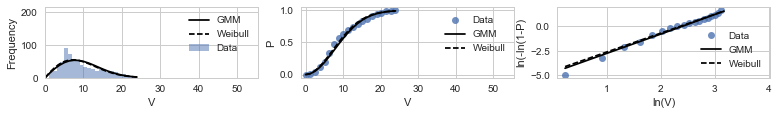

data size: 692 weight 0.016154259168475852
GMM Weibull
R square 0.700880099131 0.744392978374
max diff: 0.0962662478073 0.0662752675239 speed value: 8.81745773551 y gmm 0.474543000748
 
25.0 (15.0 - 35.0) degree


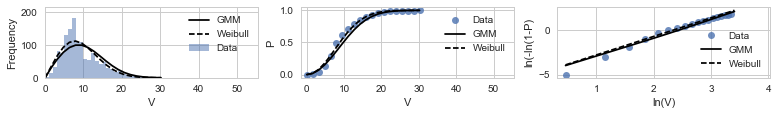

data size: 1348 weight 0.03146812335130845
GMM Weibull
R square 0.753876876497 0.836728005996
max diff: 0.138095086556 0.0660120019996 speed value: 9.54061073222 y gmm 0.48282479475
 
45.0 (35.0 - 55.0) degree


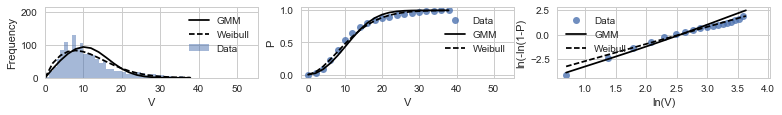

data size: 1339 weight 0.031258024604897634
GMM Weibull
R square 0.788783527393 0.867649728352
max diff: 0.099090725054 0.0521195509637 speed value: 9.96104830764 y gmm 0.432649379502
 
65.0 (55.0 - 75.0) degree


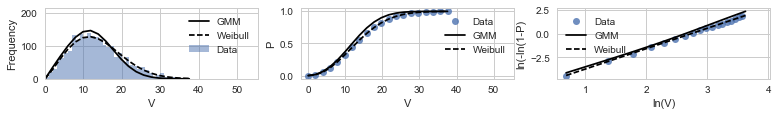

data size: 2180 weight 0.05089058524173028
GMM Weibull
R square 0.930675302014 0.973668635184
max diff: 0.0785935938258 0.0109171104274 speed value: 17.7959089054 y gmm 0.834556896578
 
85.0 (75.0 - 95.0) degree


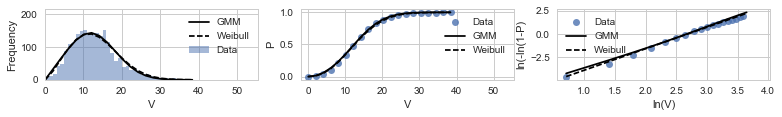

data size: 2183 weight 0.05096061815720055
GMM Weibull
R square 0.961605123134 0.961386292366
max diff: 0.0287587021841 0.0301556406229 speed value: 6.05828262643 y gmm 0.132285958254
 
105.0 (95.0 - 115.0) degree


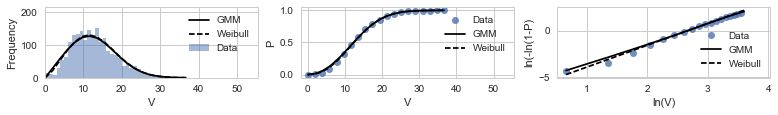

data size: 1983 weight 0.046291757125849146
GMM Weibull
R square 0.936115876067 0.947637606049
max diff: 0.0391434783617 0.0242748208799 speed value: 5.78797721614 y gmm 0.125880745129
 
125.0 (115.0 - 135.0) degree


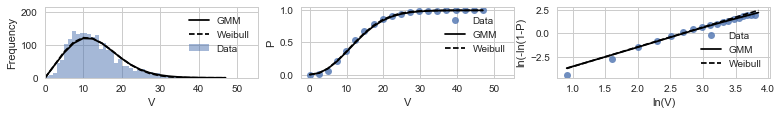

data size: 2007 weight 0.046852020449611315
GMM Weibull
R square 0.942081298388 0.946958634671
max diff: 0.0396666634101 0.0346695204484 speed value: 14.8530188899 y gmm 0.636466869226
 
145.0 (135.0 - 155.0) degree


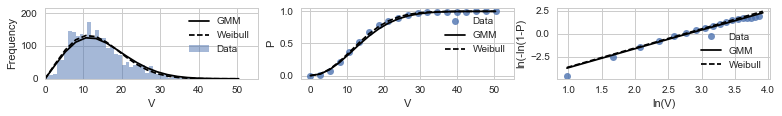

data size: 2353 weight 0.054929150033849246
GMM Weibull
R square 0.920812264965 0.937940232591
max diff: 0.0659318112526 0.0309760640784 speed value: 15.9312670222 y gmm 0.613201210422
 
165.0 (155.0 - 175.0) degree


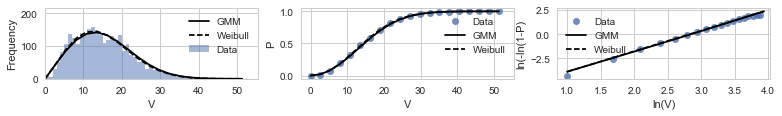

data size: 2785 weight 0.06501388986156827
GMM Weibull
R square 0.962546911786 0.966595278875
max diff: 0.0248047980349 0.00845325050481 speed value: 13.5227412691 y gmm 0.443776889577
 
185.0 (175.0 - 195.0) degree


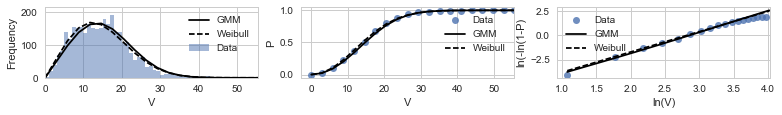

data size: 3167 weight 0.07393141443144945
GMM Weibull
R square 0.957740784841 0.96288557739
max diff: 0.0353841936481 0.0176800649978 speed value: 20.4849493892 y gmm 0.765689377555
 
205.0 (195.0 - 215.0) degree


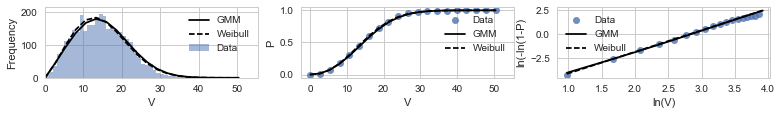

data size: 3267 weight 0.07626584494712516
GMM Weibull
R square 0.979063522241 0.978349252358
max diff: 0.02214131291 0.0169821618208 speed value: 23.9070580689 y gmm 0.888786143472
 
225.0 (215.0 - 235.0) degree


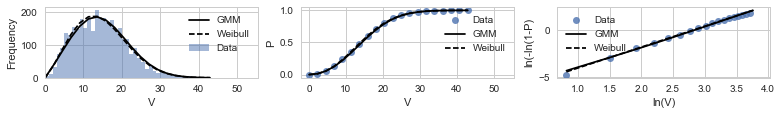

data size: 3333 weight 0.0778065690874711
GMM Weibull
R square 0.964652303005 0.966293642335
max diff: 0.0191429721467 0.0108188745918 speed value: 9.04670490751 y gmm 0.219680910242
 
245.0 (235.0 - 255.0) degree


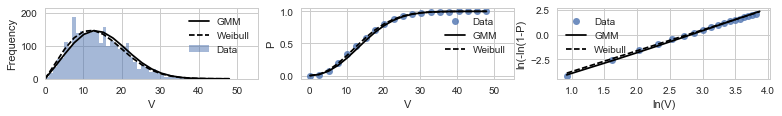

data size: 2665 weight 0.06221257324275743
GMM Weibull
R square 0.915146520997 0.939969410705
max diff: 0.0569872039491 0.0151768209107 speed value: 10.1039201888 y gmm 0.273969644081
 
265.0 (255.0 - 275.0) degree


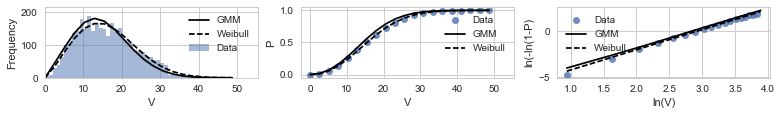

data size: 3307 weight 0.07719961715339543
GMM Weibull
R square 0.940183795601 0.964675769404
max diff: 0.0675882237986 0.0151658819424 speed value: 17.9653967657 y gmm 0.682949578501
 
285.0 (275.0 - 295.0) degree


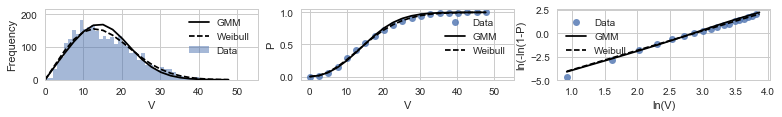

data size: 3132 weight 0.07311436375096295
GMM Weibull
R square 0.914899117531 0.955478678195
max diff: 0.0389758637151 0.0214317373554 speed value: 25.1654488035 y gmm 0.906153386065
 
305.0 (295.0 - 315.0) degree


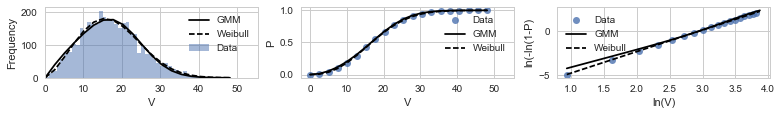

data size: 3596 weight 0.08394612134369821
GMM Weibull
R square 0.970860631752 0.979925783927
max diff: 0.0228644949077 0.00928650807189 speed value: 7.60850554338 y gmm 0.119916775219
 
325.0 (315.0 - 335.0) degree


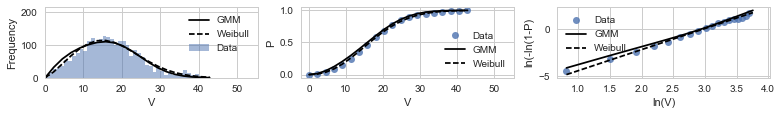

data size: 2358 weight 0.05504587155963303
GMM Weibull
R square 0.924873047075 0.947348023857
max diff: 0.0600112215965 0.0205051598321 speed value: 11.2873438753 y gmm 0.296652442971
 
345.0 (335.0 - 355.0) degree


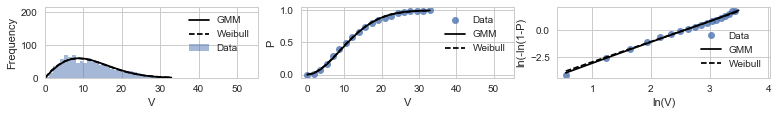

data size: 950 weight 0.02217708989891916
GMM Weibull
R square 0.905830199784 0.910821606308
max diff: 0.0386804908662 0.03020055969 speed value: 8.65748450424 y gmm 0.362372140713
 
CPU times: user 1min 3s, sys: 1.12 s, total: 1min 4s
Wall time: 1min 4s


In [58]:
%%time
if len(effective_column) == 16:
    rebinned_angle = 22.5
else: 
    rebinned_angle = 20
max_diff_array, curve_collection = model_data_comparison(df, SECTOR_LENGTH, rebinned_angle)

0.9303080059150197 0.949275456609389


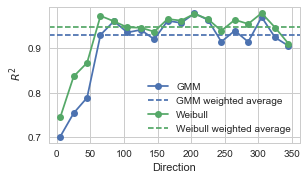

In [59]:
diff_df = pd.DataFrame(max_diff_array,columns=['datasize','direction', 'gmm', 'speed_gmm',
                                               'weibull', 'speed_weibull', 'r_square_gmm', 'r_square_weibull'])  

gmm_mean, weibull_mean = plot_sectoral_comparison(diff_df.r_square_gmm, diff_df.r_square_weibull, diff_df.direction, diff_df.datasize)
plt_configure(ylabel="$\ R^2$")
print(gmm_mean, weibull_mean)

0.04706644987498694 0.02166969786390478


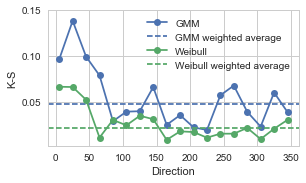

In [60]:
gmm_mean, weibull_mean = plot_sectoral_comparison(diff_df.gmm, diff_df.weibull, diff_df.direction, diff_df.datasize)
plt_configure(ylabel="K-S")
ylim = max(plt.gca().get_ylim()[1],0.15)
plt.gca().set_ylim(top=ylim)
print(gmm_mean, weibull_mean)

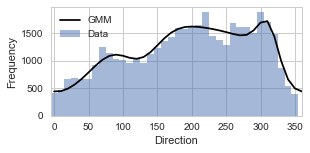

In [61]:
# Compare direction weight with previous figure
display(dir_fig)

### 5.3.1 Data Variability, by Bootstrap (Resampling)

In [62]:
max_diff_element = max(max_diff_array, key=lambda x: x[2])
angle =  max_diff_angle = max_diff_element[1]
incre = rebinned_angle

In [63]:
FRACTION = 1

# Select data from observation
start_angle, end_angle = angle-incre/2, angle+incre/2
angle_radian, incre_radian = radians(angle), radians(incre)  
sub_df, sub_max_speed = select_df_by_angle(df, start_angle, end_angle)
weibull_params = sp.stats.exponweib.fit(sub_df.speed, floc=0, f0=1)

/Users/cqcn1991/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:21: RuntimeWarning: divide by zero encountered in log
/Users/cqcn1991/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:28: RuntimeWarning: divide by zero encountered in log
/Users/cqcn1991/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:40: RuntimeWarning: divide by zero encountered in log


25.0 (15.0 - 35.0) Degree Speed Distribution
0.14152905617 10.0 0.516482813266


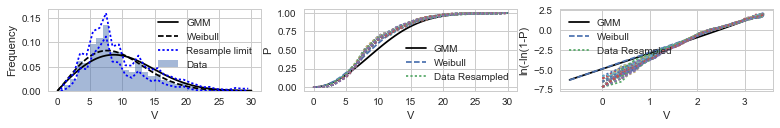

In [64]:
fig = plt.figure(figsize=(13,1.5))
ax1 = fig.add_subplot(1,3,1)   
ax2 = fig.add_subplot(1,3,2)   
ax3 = fig.add_subplot(1,3,3)   

x = arange(0, sub_max_speed, 0.5)

# 1. Data
bins=arange(0, sub_max_speed)
sub_df['speed'].hist(ax=ax1, bins=bins, alpha=0.5, label='Data', normed=True)  

# 2. GMM
y_gmm_ =[integrate.nquad(f, [[x_-0.01, x_+0.01], [angle_radian-incre_radian/2, angle_radian+incre_radian/2]]) 
          for x_ in x]
direction_prob = integrate.nquad(f, [[0, inf], [angle_radian-incre_radian/2, angle_radian+incre_radian/2]])
y_gmm = array(list(zip(*y_gmm_))[0])/direction_prob[0]/0.02  
y_gmm_cdf_ =[integrate.nquad(f, [[0, x_val],[angle_radian-incre_radian/2, angle_radian+incre_radian/2]]) for x_val in x]
y_gmm_cdf = array(list(zip(*y_gmm_cdf_))[0])/direction_prob[0]
ax1.plot(x, y_gmm,'-', color='black', label='GMM')
ax2.plot(x, y_gmm_cdf,'-', color = 'black', label='GMM')
ax3.plot(log(x), log(-log(1-y_gmm_cdf)),'-', color = 'black',label='GMM')

# 3. Weilbull 
y_weibull = sp.stats.exponweib.pdf(x, *weibull_params)
y_weibull_cdf = sp.stats.exponweib.cdf(x, *weibull_params)
ax1.plot(x, y_weibull,'--',color='black',label='Weibull')
ax2.plot(x, y_weibull_cdf,'--',label='Weibull')
ax3.plot(log(x), log(-log(1-y_weibull_cdf)),'--',label='Weibull')

# 4. Data Resampled
count_collection = []
for i in range(1,100):
    sub_df_resampled = sub_df.sample(frac=FRACTION, replace=True)    
    resampled_count, _ = np.histogram(sub_df_resampled['speed'], bins=bins, normed=True) 
    count_collection.append(resampled_count)
    
    ecdf = sm.distributions.ECDF(sub_df_resampled.speed)
    y_ecdf = ecdf(x) 
    ax2.plot(x, y_ecdf,':', label='Data Resampled')
    ax3.plot(log(x), log(-log(1-y_ecdf)),':', label='Data Resampled')
    if i == 1: 
        plt_configure(ax=ax2, xlabel='V',ylabel='P',legend={'loc':'best'})
        plt_configure(ax=ax3, xlabel='V',ylabel='ln(-ln(1-P)',legend={'loc':'best'})

print('%s (%s - %s) Degree Speed Distribution' % (angle, start_angle, end_angle))
count_collection = np.array(count_collection)
mx, mn = np.max(count_collection,0), np.min(count_collection,0)
ax1.plot(bins[1:]-0.5, mx, ':', color='blue')
ax1.plot(bins[1:]-0.5, mn, ':', color='blue', label='Resample limit')
ax1.set_ylim(bottom = 0)
plt_configure(ax=ax1, xlabel='V',ylabel='Frequency',legend={'loc':'best'})
ax1.locator_params(axis='y', nbins=5)
ax2.locator_params(axis='y', nbins=5)
ax3.locator_params(axis='y', nbins=5)

diff = abs(y_ecdf - y_gmm_cdf)
print(diff.max(), x[diff.argmax()], y_gmm_cdf[diff.argmax()])

### 5.3.2 Time Variability

In [65]:
fig_time_variability_3d = plt.figure()
ax1 = fig_time_variability_3d.gca(projection='3d')

fig_time_variability_cdf,ax2 = plt.subplots(figsize=(3,1.8))
fig_time_variability_weibull, ax3 = plt.subplots(figsize=(3,1.8))
 
x = arange(0, sub_max_speed, 0.5)

# 1. GMM
direction_prob = integrate.nquad(f, [[0, inf], [angle_radian-incre_radian/2, angle_radian+incre_radian/2]])
y_gmm_ =[integrate.nquad(f, [[x_-0.01, x_+0.01], [angle_radian-incre_radian/2, angle_radian+incre_radian/2]]) 
          for x_ in x]
y_gmm = array(list(zip(*y_gmm_))[0])/direction_prob[0]/0.02
y_gmm_cdf_ =[integrate.nquad(f, [[0, x_val],
                         [angle_radian-incre_radian/2, angle_radian+incre_radian/2]]) for x_val in x]
y_gmm_cdf = array(list(zip(*y_gmm_cdf_))[0])/direction_prob[0]

ax2.plot(x, y_gmm_cdf,'-', color='black', label = 'GMM')
ax3.plot(log(x), log(-log(1-y_gmm_cdf)),'-', color='black',label='GMM')

# 2. Weibull
y_weibull = sp.stats.exponweib.pdf(x, *weibull_params)
y_weibull_cdf = sp.stats.exponweib.cdf(x, *weibull_params)
ax2.plot(x, y_weibull_cdf,'--', label='Weibull')
ax3.plot(log(x), log(-log(1-y_weibull_cdf)), '--', label='Weibull')

# 3. Data
prop_cycle=iter(mpl.rcParams['axes.color_cycle'])
for start_time in range(20000000, 20150000, 50000):
    end_time = start_time + 50000 
    time_label = start_time//10000
    df_other_years = df_all_years.query('(date >= @start_time) & (date < @end_time)')
    df_other_years_at_angle, sub_max_speed_other_year = select_df_by_angle(df_other_years, start_angle, end_angle)
    if len(df_other_years_at_angle) > 0 :
        
        ecdf = sm.distributions.ECDF(df_other_years_at_angle.speed)
        y_ecdf = ecdf(x)
        ax2.plot(x, y_ecdf,':', label = time_label)
        ax3.plot(log(x), log(-log(1-y_ecdf)),':', label = time_label)
        
        title = '%s - %s' %(time_label, time_label+4)
        count, division = np.histogram(df_other_years_at_angle['speed'], normed=True,
                                       bins=arange(0, sub_max_speed_other_year))
        ax1.bar(left=division[:-1], height=count, zs=time_label, zdir='x', 
                color=next(prop_cycle), alpha=0.8)
        x_3d = time_label*np.ones_like(x)
        ax1.plot(x_3d, x, y_gmm, '-', color='black', label='GMM'  if time_label == 2010 else '')
        ax1.plot(x_3d, x, y_weibull, '--', color='blue', label='Weibull' if time_label == 2010 else '')
        
print('%s (%s - %s) Degree Speed Distribution' % (angle, start_angle, end_angle))
ax1.set_ylim(bottom = 0)
ax1.set_zlabel('Frequency')
plt_configure(ax=ax1, xlabel='Time',ylabel='V', legend=True)
plt_configure(ax=ax2, xlabel='V',ylabel='P',legend={'loc':'best'})
plt_configure(ax=ax3, xlabel="ln(V)", ylabel="ln(-ln(1-P)",legend={'loc':'best'})
ax1.set_zlim(bottom = 0)
align_figures()

/Users/cqcn1991/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:19: RuntimeWarning: divide by zero encountered in log
/Users/cqcn1991/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:25: RuntimeWarning: divide by zero encountered in log
/Users/cqcn1991/anaconda/lib/python3.6/site-packages/matplotlib/__init__.py:938: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))
/Users/cqcn1991/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:39: RuntimeWarning: divide by zero encountered in log


25.0 (15.0 - 35.0) Degree Speed Distribution


<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAcwAAAE5CAYAAAAdhBAsAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJzsnXl8G+Wd/z8zOn3Ish1fsR07h5NAOAq4EM5QArQcpe0C
CYRjuba0bCkFdmED24NSCiyUvqAtR48tLd1CA/yAkm05NiQcG9iWpAQIKTkc57BjS5Ysy7rn/P2h
PJORPJJG0ow8tp/368WL2LIePTOaeT7z/T7fg5FlWQaFQqFQKJS8sJM9AQqFQqFQpgJUMCkUCoVC
0QEVTAqFQqFQdEAFk0KhUCgUHVDBpFAoFApFB1QwKRQKhULRARVMCoVCoVB0QAWTQqFQKBQdUMGk
UCgUCkUHVDApFAqFQtEBFUwKhUKhUHRABZNCoVAoFB1QwaRQKBQKRQdUMCkUCoVC0QEVTAqFQqFQ
dEAFk0KhUCgVY//+/bjpppuwcuVK/OM//iOuv/567Ny5Ez/96U9x+OGHw+fzKX8bDAZxxBFH4IUX
XsDAwAAWL16MX/ziFxnjff3rX8eVV15ZkblTwaRQKBRKRUgkErjhhhtwzTXX4Nlnn8VTTz2FG2+8
EXfffTcAYO7cuXjllVeUv//zn/+M2bNnKz93dXXhtddeU34OhULYu3dvxeZvr9gnUSgUCsUy3Hbb
bXjuuecMHXPFihV48MEHc76+YcMGnHjiiTj22GOV3x199NF46qmn8LOf/QznnXceXn31VVx99dXK
359xxhnK3zY0NKC+vh59fX1YsGABXnnlFZxzzjnYtGmToceRC2phUigUCqUiDAwMoKurS/n5hhtu
wJVXXolzzjkHw8PDaGpqQlVVFfbv34+9e/eira0NLpcrY4zzzz8ff/rTnwAAb7zxBs4666yKzZ9a
mBQKhTIDefDBB/Nag2bQ1taGrVu3Kj8//vjjAICVK1dCFEUAhwRREARccMEF2LhxY8YYZ511Fi6/
/HJceOGFaG5uhtvtrtj8qYVJoVAolIpw5pln4r333sOWLVuU3+3duxfDw8NgGAYA8IUvfAFvvPEG
Nm3ahKVLl04Yo6amBvPmzcODDz6IL37xixWbO0AFk0KhUCgVoqamBo8//jh++9vf4oorrsCll16K
O++8E3fccQfa29sBAB6PB21tbViyZAlYVluiLrjgAmzevBknnXRSJacPRpZluaKfSKFQKBTKFIRa
mBQKhUKh6IAKJoVCoVAoOqBRspQZiSRJEAQBHMfBZrOBZVnYbDbYbDYl+IBCoVDUUMGkzCgkSYIo
ipAkCbIsK/9Xb+WzLAuWZcEwDBVSCoWiQAWTMiNQC6UWajGUZVnJCSNCyjAMGIaBJElIJBKor6+n
QkqhzDCoYFKmNcT1WmoweLaQplIpjIyMoKqqSnmdWKLk/3a7XfmZQqFMH2jQD2VaIooiBgcHEY1G
SxZLLRiGgSzLilAChyxSQRCQSqUQi8UQiUQQjUYRj8eRSCSQSqUgiqKhc6FQphpXXXUVPvroIwAA
x3Ho7e3Fr371K+X1K6+8En//+98nvO/tt9/GmjVrMDAwgJUrV+r+vFNOOUUZt6+vr8zZU8GkTDNE
UQTHceB5HuFwWHGtVgoipERYCwkpx3FUSCkzhlNOOUUplL5582aceuqpeOuttwAAqVQKg4ODOOyw
wya8b9myZbjkkksqOlctqGBSpgVqoVRbgIWEqBS3aSnilktIk8kkotGoIqSJRALJZJIKKaUizJ07
8b877ij99UKcfPLJimC+9dZbWLFiBSKRCCKRCD744AOccMIJeP/997Fq1SpcccUVuOOOO8DzPF54
4QX86Ec/AgCMjo7i61//OlasWIFHH30UALB69Wq8/fbbANLW6OrVq0s9JXmhe5iUKY0oikowj9pN
CkCXYBaL0fuS2a5dQRCUfxPhJ2kv6qhdukdKmYosWbIEu3fvhizLeP/993HrrbfipJNOwrvvvovt
27fj1FNPxXe+8x08/fTTmDVrFh5++GG8+OKLsNsPSVU8HseDDz6I6upqXH755TjzzDMrNn8qmJQp
B0kHySWU2X87FVEfkyRJSnSvOmqXpL+Q1Jjq6uq854JCyWbPHnNfz4ZlWRx22GF4++230dzcDKfT
iWXLluHNN9/Ep59+issvvxzf+c53cPPNNwMAkskkTj75ZHR3dytjHHbYYfB4PACAo446Cv39/Rmf
YeY9TwWTMmUoRigB461BMuZkirD6mIiQjo+PIxaLoa2tLUNIiXVKLFIKxQqccsop+PnPf47zzz8f
ANDb24vHHnsMQLpBdFtbGx577DF4PB688cYbqK6uxtDQkPL+vr4+xGIxuFwufPTRR7jkkkvw3nvv
YWRkBACwbds20+ZOBZNieYhQkvQQvVZUIXGbLpaY2uoEMi1SjuOU17KF1G63T5tzQJk6nHzyyfj2
t7+NBx54AADgdDrh8Xhw+OGHg2VZ/Pu//zuuv/56yLKMmpoaPPDAAxmC6fV6ccstt2B0dBTnnXce
enp6sGLFCtx5551Yu3Yt5urZTC0R2q2EYllIcAwJfil2cd+3bx+8Xi+8Xm/OvyGCohee57Fv3z4s
WLCgqPeZSTgcRiKRQFtbm+73aLl2GYaB3W6nxRgolBxQC5NiObSEspQFfCoE/UwWWq5dQNsipeUB
KZQ0VDAploGkhrAsW5ZQqqEOlOLQElL1OSTuXFpnlzIToYJJmXSIRRmNRjE4OIienh5DFuDpGPQz
GWSfx+w6uwAtWE+ZGVDBpEwaWq5XM8rYUcyhUMH6vXv3oru7WwkuokJKmepQwaRUnFx7lJMhmKV8
JhXh/BAxJPuhuTq/UIuUMtWggkmpGOqScAAm7FGS9llGQYN+rEUhixSY6NqlnV8oVoIKJsV0SLEB
skDmWvzMEDhqDU4O2bmh+cgnpKlUCgByFmOgQkqpJFQwKaahrsqjJ4+SRMcaRT4BFkURwWAQ4+Pj
cDgccLlccDqdcLlceRP66b5o5cglpOoC++rUF1pnl2I2VDAphqMllEZU5ikWrc8kQhkMBuHxeNDc
3AyO48BxHMbGxpBKpSDLMpxOpyKgREzVBaAp+Sml0IRetHqRkv1wtZBmp79QIaWUC10BKIZRqlAS
zAz6yRbK+fPnw+Vyged5VFVVZbxPFEWkUilwHIdUKoVoNIpUKgWGYeB0OgEAY2NjipDabDbD5jxd
MFMwc5Gv8wt5nWVZhEIhzJo1K6M8IBVSih6oYFLKplyhzMaoxZZhGAiCAL/fP0Eo82Gz2VBdXY3q
6uqMOQmCAI7jMDg4iEQigXA4DI7jYLPZMly6LpcLDoejYgXPqYs4P+prSRRF+Hw+1NXVged55XWt
PVIqpJRsqGBSSkYQBASDQdTX1yu/K2eBUaeWlLtQkUII8XgcXq9Xl1AWmpvD4YDD4QAApTOILMvg
eT7DGh0dHQXP83A4HIqIkv87HI4ZsQhPhoWph1zBSLRgPUUPVDApRUM6h4iiiMHBwQzBLJdy3bJq
16vD4YDX60VnZ6dh8wOQIerETet0OlFbW6v8jSRJ4Hlece2Oj4+D4zgIgjBBRMn+KF2IzUePkBdT
Z5cWrJ9ZUMGk6IYEV6h7UaoDLYygVMHU2qMke4+TAcuyintWjSRJGfuj8Xg8I9Ao27Wrd3/Uaou1
lS3MUudFC9ZTqGBSCqIllIA1arXmCuYBgFgsZkqlH6D0fUOWZVFVVTUh0IjsjxIxjUQi4DgODMNM
sEZdLhdtCF0iZgi5noL1VEinB1QwKTnJJZRqWJaFJEmGRYrqFbB8QlnsWKXM0WjsdjvsdrtmoBER
0Xg8jrGxMXAcB7vdroinIAi6c10rhZXmokaW5Yo8bOTaI6WdX6Y2VDApE9AjlIRK13/VI5RqpnIE
aXagEYEEGqV

### 5.3.3 Adjacent Sector Variability

In [66]:
incre = rebinned_angle
angle_group = [max_diff_angle-incre, max_diff_angle, max_diff_angle+incre]

In [67]:
fig_adjecent_variability_3d = plt.figure()
ax1 = fig_adjecent_variability_3d.gca(projection='3d')
fig_adjecent_variability_cdf, ax2 = plt.subplots(figsize=(3,1.8))
fig_adjecent_variability_weibull, ax3 = plt.subplots(figsize=(3,1.8))

legend_3d = False
prop_cycle=iter(mpl.rcParams['axes.color_cycle'])

curve_df = pd.DataFrame(curve_collection)

for angle in angle_group:
    curves = curve_df.query('angle == @angle%360').T.to_dict()
    curves = curves[list(curves)[0]]
    data_size, x =  curves['data_size'], curves['x']
    y_gmm, y_cdf_gmm =  curves['gmm_pdf'], curves['gmm_cdf'] 
    y_weibull, y_cdf_weibull, y_cdf = curves['weibull_pdf'],  curves['weibull_cdf'], curves['ecdf']

    linestyle = '-' if angle == max_diff_angle else ':'
    alpha = 0.7 if angle == max_diff_angle else 0.3

    ax2.plot(x, y_gmm*data_size, linestyle, label=angle)        
    ax3.plot(x, y_weibull*data_size, linestyle, label=angle)

    start_angle, end_angle = angle-incre/2, angle+incre/2
    sub_df, sub_max_speed = select_df_by_angle(df, start_angle, end_angle)

    x_3d = angle*np.ones_like(x)
    ax1.plot(x_3d, x, y_gmm*data_size, color='black', label='GMM')
    ax1.plot(x_3d, x, y_weibull*data_size, color='blue', linestyle='--',label='Weibull')

    count, division = np.histogram(sub_df['speed'], bins=arange(0, sub_max_speed))
    ax1.bar(left=division[:-1], height=count, zs=angle, zdir='x', color=next(prop_cycle), alpha=0.8)

    if legend_3d == False:
        ax1.legend()
        legend_3d = True
        
plt_configure(ax=ax1, xlabel='Direction', ylabel='Speed')   
plt_configure(ax=ax2, xlabel='V',ylabel='Frequency',legend={'loc':'best'})
plt_configure(ax=ax3, xlabel='V',ylabel='Frequency',legend={'loc':'best'})
ax1.set_zlabel('Frequency')
ax1.set_zlim(bottom = 0)
ylim = max(ax1.get_ylim()[1],ax3.get_ylim()[1])
ax2.set_ylim(bottom = 0, top=ylim)
ax3.set_ylim(bottom = 0, top=ylim)

print(max_diff_angle) 
print('GMM, Weibull, Histogram')
align_figures()

/Users/cqcn1991/anaconda/lib/python3.6/site-packages/matplotlib/__init__.py:938: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


25.0
GMM, Weibull, Histogram


<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAcwAAAE5CAYAAAAdhBAsAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJzsfXl0HNWZ/a3qRWq19t3aLBvbGON4QszmQDwwwJBhOUwS
7AxgIGwBZibE5EwIMAOEIcsESEKGAU6AyeYwMSaBhEwCORNPWAL+ERIyLAYb25JtyZJ6kdSt3peq
+v0hXvl1qaq71la39O45HKyWqur19m5933e/+3GSJElgYGBgYGBgKAp+vhfAwMDAwMBQDWCEycDA
wMDAoAOMMBkYGBgYGHSAESYDAwMDA4MOMMJkYGBgYGDQAUaYDAwMDAwMOsAIk4GBgYGBQQcYYTIw
MDAwMOgAI0wGBgYGBgYdYITJwMDAwMCgA4wwGRgYGBgYdIARJgMDAwMDgw4wwmRgYGBgYNABRpgM
DAwMDAw6wAiTgYGBgYFBBxhhMjAwMDCUDSMjI7jpppuwefNmXHHFFfjsZz+Lffv24cEHH8Rxxx2H
QCAg/+3k5CSOP/54PP300xgdHcWxxx6LRx99tOB8N9xwAy6//PKyrJ0RJgMDAwNDWZBKpXDjjTfi
qquuwo4dO/CjH/0I//iP/4h//dd/BQAMDg7iueeek//+17/+NZYsWSL/PDAwgN/85jfyz9PT0zh0
6FDZ1u8u25UYGBgYGCoGX/ziF/HUU0/Zes5Nmzbhvvvu0/z97373O5x66qk44YQT5MfWrVuHH/3o
R/iP//gPnHfeeXj++efxmc98Rv77M888U/7blpYWNDc348CBAzjmmGPw3HPP4eMf/zj++Mc/2vo8
tMAiTAYGBgaGsmB0dBQDAwPyzzfeeCMuv/xyfPzjH8fExATa29vh8/kwMjKCQ4cOobu7GzU1NQXn
OP/88/GrX/0KALBz506cffbZZVs/izAZGBgYFiHuu+++otGgE+ju7sY777wj//zII48AADZv3gxB
EAAcJcR8Po8LL7wQr7zySsE5zj77bFx22WX45Cc/iY6ODtTW1pZt/SzCZGBgYGAoC8466yzs2rUL
//d//yc/dujQIUxMTIDjOADAueeei507d+KPf/wjTjnllDnn8Pv9WLZsGe677z5ccMEFZVs7wAiT
gYGBgaFM8Pv9eOSRR/DDH/4QW7Zswd/93d/h9ttvx2233Yaenh4AQENDA7q7u7FmzRrwvDpFXXjh
hfjTn/6EDRs2lHP54CRJksp6RQYGBgYGhioEizAZGBgYGBh0gBEmAwMDAwODDjCVLMOihCiKyOfz
yGazcLlc4HkeLpcLLpdLFh8wMDAw0GCEybCoIIoiBEGAKIqQJEn+P13K53kePM+D4zhGpAwMDDIY
YTIsCtBEqQaaDCVJknvCCJFyHAeO4yCKIlKpFJqbmxmRMjAsMjDCZFjQIKlXs2JwJZFmMhmEQiH4
fD759yQSJf93u93yzwwMDAsHTPTDsCAhCAKy2Syy2axpslQDx3GQJEkmSuBoRJrP55HJZJBIJBCL
xRCPx5FMJpFKpZDJZCAIgq1rYWCoNlx55ZV46623AADZbBbr16/H448/Lv/+8ssvx3vvvTfnuJde
eglPPvkkRkdHsXnzZt3XO+200+TzHjhwwOLqGWEyLDAQoszlcjKxlROESAmxliLSbDbLiJRh0eC0
006TjdL/9Kc/4fTTT8eLL74IAMhkMjhy5AhWr14957iNGzfi05/+dFnXqgZGmAwLAmaJ0gyhmiE3
LSJNp9OIx+OIxWKYmprC2NgY0uk0I1KGsmBwcO5/t91m/vel8NGPflQmzBdffBGbNm1CLBZDLBbD
n//8Z5x88sl4/fXXcckll2DLli247bbbkMvl8PTTT+P+++8HAExNTeGGG27Apk2b8NBDDwEAbr31
Vrz00ksAZqPRW2+91exLUhSshslQ1RAEQRbz0GlSp2D3+ek153I5RCIRNDQ0yMpdjuPkthdatctq
pAzViDVr1mBoaAiSJOH111/HF77wBWzYsAGvvvoq9u7di9NPPx133HEH/uu//gttbW144IEH8Mwz
z8DtPkpVyWQS9913H+rq6nDZZZfhrLPOKtv6GWEyVB1IO8jY2Bj8fj/8fr/pSHE+0rZ6QBOpKIqy
updW7SrbX9xud1luGhgWDg4edPb3SvA8j9WrV+Oll15CR0cHvF4vNm7ciBdeeAF79uzBZZddhjvu
uANbt24FAKTTaXz0ox/F0qVL5XOsXr0aDQ0NAIAPfehDGB4eLriGk1kZRpgMVQNClCSiTKfTc2bl
6T1PPB5HMBhEKpWC1+uF1+tFTU2N/H+Px6NKPCSl6hRKnZtekx4iJa0vWibWDAzlxmmnnYbvfve7
OP/88wEA69evx8MPPwxgdkB0d3c3Hn74YTQ0NGDnzp2oq6vD+Pi4fPyBAweQSCRQU1ODt956C5/+
9Kexa9cuhEIhAMC7777r2NoZYTJUPAhRkvYQZT3QyHlisRiCwSAkSUJnZydqampkNW0mk8HMzIys
aFUjUifJ0kpkqEWk2WwWwOxzn5ycxJIlS2QiJREpA0M58dGPfhT/8i//gnvvvRcA4PV60dDQgOOO
Ow48z+Of//mf8dnPfhaSJMHv9+Pee+8tIMympibcfPPNmJqawnnnnYcVK1Zg06ZNuP322/HLX/4S
g3qKqSbBppUwVCyIOIaIX5Sb++joKPx+P1paWkqeZ2ZmRr4D7ezsRENDAziOkwlFCVEUkclkZCIl
/yfOQI2NjQVEaoeBQSqVQigUKphIbxcEQcDw8DBWrFgBQDsidbvdzIyBgUEDLMJkqDioEaWZ9Cgh
ymAwCI7jCoiyFHieh8/nkw0KCDKZDEZGRlBbW4tMJoN4PI5MJgMABQRKE2klQPk6lYpIaSJl9oAM
DLNghMlQMdBLlARahClJEqLRKEKhEHieR3d3N+rr623Z7AlpNDc3z1k3iUJJajebzYLjuDlE6vV6
54VI9Tx/NSKlX2OSzmU+uwyLEYwwGeYdRolSeSz9b6eIkkCNpEkq0+12o66urmA9ZCJKJpNBKpVC
JBKRJ6QoiVTL53a+oXz9lD67ABCJROD3+1FXV8eIlGHBghEmw7yBqFXj8ThaWloMt0TQ1nSRSASh
UAhutxtLliwx3WpiJziOg8fjgcfjgd/vlx+XJAm5XE4m0kQigampKeRyOQDAkSNH5pDpfD8XNdBr
SiaTcLvd8Hq9cwzr2eQXhoUCRpgMZQcdUaZSKcRiMbS2tpo6FyEbt9uNnp4ew0Rppk3Eqk6O4zg5
NVtfXy8/nkwmEQwG0djYKNdHJycnkc/n4fF4dLe+zBfIWvROfmFEylBtYITJUDbQlnDAUWGJ0VSk
KIqIRCKYnp6Gy+VCX19fQQTnJJzc0AmRNDQ0yI3ZwOzzNdL6otYu4rQYXs/5SxEpMHcWKZv8wlBJ
YITJ4DiI2QDZIOnNz0iER4gyFAqhpqYGjY2Nc9KdCxE8z6O2tha1tbUFj9OtL9lsFpFIRG59UaZ0
y2FcYJbUihEpeT7BYBB9fX1zzBgYkTKUE4wwGRwD7cqjZUHH83xJwhRFEdPT0wiFQqitrUV/fz/q
6uoQCoXkzbVccNrpxwi0Wl+Uil3S+iKKIkZGRiq29UUJ+vOSSCTk95o22KdbX5jPLoPTYITJYDvU
iFJrAytGQDRR+nw+DAwMFKhQK4m87IBdm7zL5ZpDpNlsFiMjI2hra3Ok9cVJT17ludVmkRKFNU2k
yvYXRqQMVsEIk8E2GCFKAjXSE0URU1NTCIfD8Pl8WLp06ZwoSuvYcqFSTdu1QN6Luro6Q60vhERp
Ii23L63e91hJpKRWzgzrGewCI0wGy8hms0gkEqirqzPcR0mTHk2UdXV1mkSpdmy5UK0bq9brZKb1
hbSP0FEpGa/

# 6. Result Variability & Cross-Validation

In [68]:
if 'bandwidth' not in globals():
    bandwidth = DEFAULT_BANDWDITH    
if 'FIT_METHOD' not in globals():
    FIT_METHOD = 'square_error'       
if 'KDE_KERNEL' not in globals():
    KDE_KERNEL = 'gaussian'
    
config = {'bandwidth': bandwidth, 
          'fitting_range': FITTING_RANGE,
          'fit_limit': fit_limit,
          'kde_kernel': KDE_KERNEL}

## 6.1 Variability of the Result

weight  mean_x   mean_y   sig_x   sig_y    corr
1  0.680  -6.227   -4.396  10.036  10.217  -0.223
2  0.202   2.093    9.072   6.625   6.923  -0.134
3  0.117  10.093  -12.827   6.941   6.216  -0.337

GMM Plot Result
0.68036714353 [[-6.22674795 -4.3959505 ]] [  8.92167353  11.20316254] -137.292787813
0.202455411844 [[ 2.09288577  9.07205984]] [ 6.279685    7.23749771] -144.107805789
0.117177444626 [[ 10.0929539 -12.8272907]] [ 5.29997503  7.66254879] -125.925599463


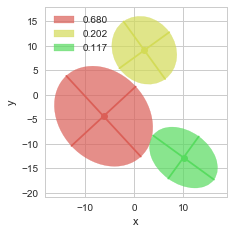

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.980  0.015      0.071  2.116387e-09      0.036       0.153

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.980  0.015      0.067  2.136059e-09      0.036       0.154

weight  mean_x   mean_y   sig_x   sig_y    corr
1  0.680  -6.227   -4.396  10.036  10.217  -0.223
2  0.202   2.093    9.072   6.625   6.923  -0.134
3  0.117  10.093  -12.827   6.941   6.216  -0.337

GMM Plot Result
0.68036714353 [[-6.22674795 -4.3959505 ]] [  8.92167353  11.20316254] -137.292787813
0.202455411844 [[ 2.09288577  9.07205984]] [ 6.279685    7.23749771] -144.107805789
0.117177444626 [[ 10.0929539 -12.8272907]] [ 5.29997503  7.66254879] -125.925599463


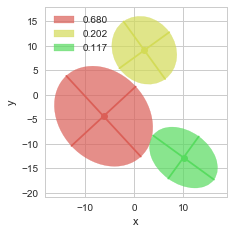

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.980  0.015      0.071  2.116387e-09      0.036       0.153

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.980  0.015      0.067  2.136059e-09      0.036       0.154

weight  mean_x   mean_y   sig_x   sig_y    corr
1  0.680  -6.227   -4.396  10.036  10.217  -0.223
2  0.202   2.093    9.072   6.625   6.923  -0.134
3  0.117  10.093  -12.827   6.941   6.216  -0.337

GMM Plot Result
0.68036714353 [[-6.22674795 -4.3959505 ]] [  8.92167353  11.20316254] -137.292787813
0.202455411844 [[ 2.09288577  9.07205984]] [ 6.279685    7.23749771] -144.107805789
0.117177444626 [[ 10.0929539 -12.8272907]] [ 5.29997503  7.66254879] -125.925599463


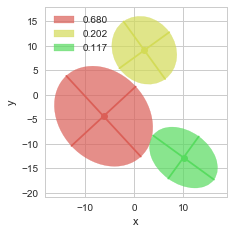

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.980  0.015      0.071  2.116387e-09      0.036       0.153

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.980  0.015      0.067  2.136059e-09      0.036       0.154

weight  mean_x   mean_y   sig_x   sig_y    corr
1  0.680  -6.227   -4.396  10.036  10.217  -0.223
2  0.202   2.093    9.072   6.625   6.923  -0.134
3  0.117  10.093  -12.827   6.941   6.216  -0.337

GMM Plot Result
0.68036714353 [[-6.22674795 -4.3959505 ]] [  8.92167353  11.20316254] -137.292787813
0.202455411844 [[ 2.09288577  9.07205984]] [ 6.279685    7.23749771] -144.107805789
0.117177444626 [[ 10.0929539 -12.8272907]] [ 5.29997503  7.66254879] -125.925599463


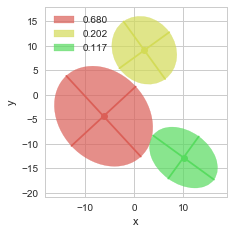

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.980  0.015      0.071  2.116387e-09      0.036       0.153

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.980  0.015      0.067  2.136059e-09      0.036       0.154

weight  mean_x  mean_y   sig_x  sig_y    corr
1  0.620  -4.315  -7.663  12.189  9.925  -0.366
2  0.317  -0.058   7.593   7.895  7.291   0.052
3  0.063   3.371  -8.449  10.494  5.272  -0.826

GMM Plot Result
0.620072953966 [[-4.31493032 -7.66348891]] [  8.52283257  13.20773915] -120.268488178
0.31709148612 [[-0.05848722  7.59308182]] [ 7.22853414  7.9515516 ] -73.3388614331
0.0628355599147 [[ 3.37109355 -8.44880893]] [  2.72979376  11.42186977] -113.994222997


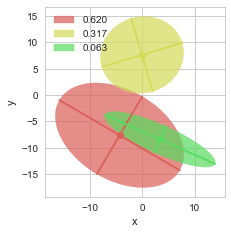

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.983  0.007      0.023  1.817760e-09      0.032       0.142

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.980  0.007      0.025  2.150854e-09      0.036       0.155

weight  mean_x  mean_y   sig_x  sig_y    corr
1  0.620  -4.315  -7.663  12.189  9.925  -0.366
2  0.317  -0.058   7.593   7.895  7.291   0.052
3  0.063   3.371  -8.449  10.494  5.272  -0.826

GMM Plot Result
0.620072953966 [[-4.31493032 -7.66348891]] [  8.52283257  13.20773915] -120.268488178
0.31709148612 [[-0.05848722  7.59308182]] [ 7.22853414  7.9515516 ] -73.3388614331
0.0628355599147 [[ 3.37109355 -8.44880893]] [  2.72979376  11.42186977] -113.994222997


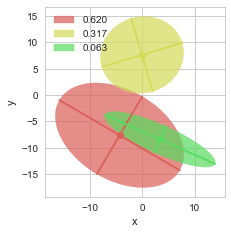

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.983  0.007      0.023  1.817760e-09      0.032       0.142

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.980  0.007      0.025  2.150854e-09      0.036       0.155

weight  mean_x  mean_y   sig_x  sig_y    corr
1  0.620  -4.315  -7.663  12.189  9.925  -0.366
2  0.317  -0.058   7.593   7.895  7.291   0.052
3  0.063   3.371  -8.449  10.494  5.272  -0.826

GMM Plot Result
0.620072953966 [[-4.31493032 -7.66348891]] [  8.52283257  13.20773915] -120.268488178
0.31709148612 [[-0.05848722  7.59308182]] [ 7.22853414  7.9515516 ] -73.3388614331
0.0628355599147 [[ 3.37109355 -8.44880893]] [  2.72979376  11.42186977] -113.994222997


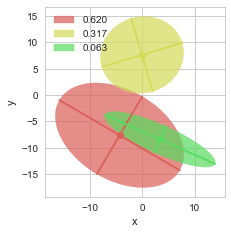

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.983  0.007      0.023  1.817760e-09      0.032       0.142

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.980  0.007      0.025  2.150854e-09      0.036       0.155

weight  mean_x  mean_y   sig_x  sig_y    corr
1  0.620  -4.315  -7.663  12.189  9.925  -0.366
2  0.317  -0.058   7.593   7.895  7.291   0.052
3  0.063   3.371  -8.449  10.494  5.272  -0.826

GMM Plot Result
0.620072953966 [[-4.31493032 -7.66348891]] [  8.52283257  13.20773915] -120.268488178
0.31709148612 [[-0.05848722  7.59308182]] [ 7.22853414  7.9515516 ] -73.3388614331
0.0628355599147 [[ 3.37109355 -8.44880893]] [  2.72979376  11.42186977] -113.994222997


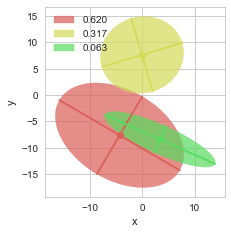

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.983  0.007      0.023  1.817760e-09      0.032       0.142

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.980  0.007      0.025  2.150854e-09      0.036       0.155

weight  mean_x  mean_y   sig_x   sig_y    corr
1  0.666  -4.233  -6.803  12.091  10.212  -0.330
2  0.268  -0.011   8.247   7.667   6.831   0.060
3  0.066   3.654  -8.922  10.503   5.302  -0.812

GMM Plot Result
0.665890905888 [[-4.23279371 -6.80274289]] [  8.91258046  13.0784615 ] -121.384760569
0.267800634869 [[-0.01114257  8.24707189]] [ 6.77379947  7.71764735] -76.2369631994
0.0663084592422 [[ 3.65436852 -8.92202513]] [  2.84347131  11.41634449] -113.872811061


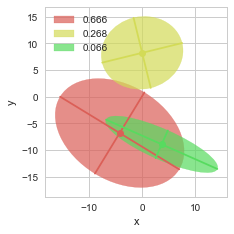

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.982  0.008      0.031  1.960383e-09      0.034       0.148

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.980  0.008      0.030  2.142003e-09      0.036       0.154

weight  mean_x  mean_y   sig_x   sig_y    corr
1  0.666  -4.233  -6.803  12.091  10.212  -0.330
2  0.268  -0.011   8.247   7.667   6.831   0.060
3  0.066   3.654  -8.922  10.503   5.302  -0.812

GMM Plot Result
0.665890905888 [[-4.23279371 -6.80274289]] [  8.91258046  13.0784615 ] -121.384760569
0.267800634869 [[-0.01114257  8.24707189]] [ 6.77379947  7.71764735] -76.2369631994
0.0663084592422 [[ 3.65436852 -8.92202513]] [  2.84347131  11.41634449] -113.872811061


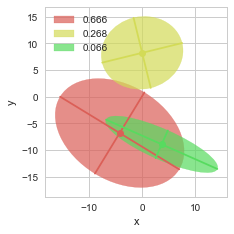

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.982  0.008      0.031  1.960383e-09      0.034       0.148

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.980  0.008      0.030  2.142003e-09      0.036       0.154


CPU times: user 3.59 s, sys: 173 ms, total: 3.76 s
Wall time: 44.7 s


In [69]:
%%time
results = Parallel(n_jobs=-1)(delayed(resampled_fitting)(df, FIT_METHOD, NUMBER_OF_GAUSSIAN, config) for i in range(10))                        
for result in results:
    display(pretty_print_gmm(result['gmm']))
    fig,ax = plt.subplots(figsize=(3.5,3.5))
    plot_gmm_ellipses(result['gmm'],ax=ax)
    plt.show()
    
    display(gof_df(result['gmm_pdf_result'], result['kde_result']))
    display(gof_df(result['gmm_pdf_result'], kde_result))
    print('')

## 6.2 Cross-validation, to select the number of Gaussian

In [70]:
%%time
from sklearn.cross_validation import train_test_split, KFold

## 5-fold cross validation
gaussian_number_range = arange(1,6)
CV_result_train_all,CV_result_test_all =[],[]
number_of_fold = 4
print('Number of train/test dataset', len(df)*(number_of_fold-1)/number_of_fold, len(df)/number_of_fold) 

for number_of_gaussian in gaussian_number_range:
    print( '  ')
    print('Number of gaussian', number_of_gaussian)
    
    kf = KFold(len(df), n_folds=number_of_fold, shuffle=True) 

    CV_result = Parallel(n_jobs=-1)(delayed(fit_per_fold)(df, train_index, test_index, FIT_METHOD, number_of_gaussian, config) for train_index, test_index in kf)                        

    CV_result_train, CV_result_test = list(zip(*CV_result))
    CV_result_train, CV_result_test = list(CV_result_train), list(CV_result_test)
        
    CV_result_train_all.append(CV_result_train)
    CV_result_test_all.append(CV_result_test)
    
    print('Train')
    pretty_pd_display(CV_result_train)
    print('Test')
    pretty_pd_display(CV_result_test)

Number of train/test dataset 32127.75 10709.25
  
Number of gaussian 1
Train


Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  R_square
0    0.076895  0.020759  8.452201e-09    0.072203     0.306479  0.921745
1    0.075879  0.021235  7.980223e-09    0.069409     0.297717  0.925556
2    0.077025  0.020728  8.522406e-09    0.070589     0.307552  0.922399
3    0.075915  0.021554  8.358954e-09    0.070118     0.304772  0.922776

Test


Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  R_square
0    0.081079  0.024031  8.586268e-09    0.067742     0.308604  0.921698
1    0.080235  0.020497  9.522161e-09    0.073131     0.325257  0.914986
2    0.084335  0.031122  8.575095e-09    0.074838     0.308999  0.917767
3    0.080473  0.023847  8.299624e-09    0.071060     0.303446  0.923768

  
Number of gaussian 2
Train


Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  R_square
0    0.033999  0.011333  2.796975e-09    0.040775     0.176227  0.974411
1    0.032604  0.011428  2.605384e-09    0.039462     0.170137  0.975958
2    0.034510  0.011477  2.898125e-09    0.041861     0.179480  0.973097
3    0.033533  0.010855  2.794957e-09    0.041012     0.176152  0.974095

Test


Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  R_square
0    0.040495  0.014434  3.227646e-09    0.044462     0.189456  0.969497
1    0.043438  0.017378  3.803359e-09    0.047383     0.205469  0.964994
2    0.035219  0.009088  2.894433e-09    0.040737     0.179126  0.973812
3    0.037730  0.011072  3.169005e-09    0.042843     0.187761  0.971191

  
Number of gaussian 3
Train


Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  R_square
0    0.053330  0.015206  2.013619e-09    0.034887     0.149590  0.981475
1    0.028204  0.007640  2.022138e-09    0.034555     0.149857  0.981254
2    0.064069  0.015714  2.137178e-09    0.035727     0.154126  0.980321
3    0.068677  0.016123  2.196008e-09    0.036562     0.156108  0.979685

Test


Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  R_square
0    0.093742  0.020720  3.120245e-09    0.042691     0.186038  0.971020
1    0.036083  0.010021  2.836612e-09    0.042141     0.177556  0.974208
2    0.067313  0.016943  2.583583e-09    0.038835     0.169237  0.976039
3    0.054504  0.016000  2.412278e-09    0.037145     0.163921  0.977936

  
Number of gaussian 4
Train


Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  R_square
0    0.017044  0.009765  1.113496e-09    0.025901     0.111282  0.989724
1    0.016656  0.005603  1.049145e-09    0.025116     0.108002  0.990301
2    0.021236  0.007768  1.073946e-09    0.025590     0.109136  0.990040
3    0.015334  0.006760  1.051528e-09    0.024840     0.108041  0.990346

Test


Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  R_square
0    0.018945  0.012479  1.764556e-09    0.032271     0.139741  0.983770
1    0.022035  0.009987  1.720218e-09    0.032104     0.138039  0.984233
2    0.024961  0.012232  1.749030e-09    0.031435     0.139707  0.984133
3    0.026499  0.015194  1.642053e-09    0.031926     0.135178  0.984627

  
Number of gaussian 5
Train


Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  R_square
0    0.012964  0.008970  7.522224e-10    0.021602     0.091439  0.993041
1    0.027572  0.004713  9.783796e-10    0.024517     0.104216  0.990943
2    0.015776  0.009131  7.746404e-10    0.021113     0.092718  0.992912
3    0.015914  0.008415  7.146017e-10    0.020420     0.089130  0.993376

Test


Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  R_square
0    0.020861  0.009175  1.442542e-09    0.027244     0.126454  0.986836
1    0.035480  0.006510  1.573068e-09    0.029663     0.132306  0.985634
2    0.019472  0.011055  1.216891e-09    0.028502     0.116420  0.988501
3    0.019953  0.010559  1.264514e-09    0.026270     0.118369  0.988501

CPU times: user 1.03 s, sys: 248 ms, total: 1.27 s
Wall time: 2min 4s


In [71]:
train_scores_mean, train_scores_std = generate_mean_std_gof(CV_result_train_all)
print('Train gof mean, std')
display(train_scores_mean)

test_scores_mean, test_scores_std = generate_mean_std_gof(CV_result_test_all)
print('Test gof mean, std')
display(test_scores_mean)

Train gof mean, std


Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  R_square
1    0.076428  0.021069  8.328446e-09    0.070580     0.304130  0.923119
2    0.033661  0.011273  2.773860e-09    0.040778     0.175499  0.974390
3    0.053570  0.013671  2.092236e-09    0.035433     0.152420  0.980684
4    0.017568  0.007474  1.072029e-09    0.025362     0.109115  0.990103
5    0.018056  0.007807  8.049610e-10    0.021913     0.094376  0.992568

Test gof mean, std


Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  R_square
1    0.081531  0.024874  8.745787e-09    0.071693     0.311577  0.919555
2    0.039220  0.012993  3.273611e-09    0.043856     0.190453  0.969873
3    0.062911  0.015921  2.738179e-09    0.040203     0.174188  0.974801
4    0.023110  0.012473  1.718964e-09    0.031934     0.138166  0.984191
5    0.023941  0.009325  1.374253e-09    0.027920     0.123387  0.987368

R_square


/Users/cqcn1991/anaconda/lib/python3.6/site-packages/matplotlib/__init__.py:938: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


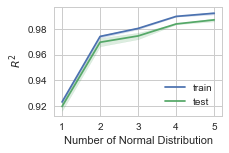

K_S


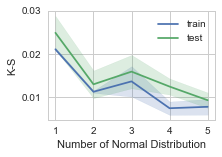

Chi_square


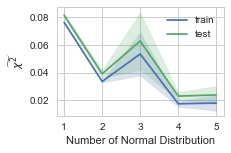

In [72]:
prop_cycle=mpl.rcParams['axes.color_cycle']
gaussian_number_range = train_scores_mean.index
for column, column_name in zip(['R_square','K_S','Chi_square'],["$\ R^2$", "K-S", "$\widetilde{\chi^2} $"]):
    plot(gaussian_number_range, train_scores_mean[column],
             '-', label = 'train', color=prop_cycle[0])
    plt.fill_between(gaussian_number_range, 
                     train_scores_mean[column] - train_scores_std[column],
                     train_scores_mean[column] + train_scores_std[column], 
                     alpha=0.2, color=prop_cycle[0])
    
    plot(gaussian_number_range, test_scores_mean[column],
             '-', label = 'test',color=prop_cycle[1])
    plt.fill_between(gaussian_number_range, 
                 test_scores_mean[column] - test_scores_std[column],
                 test_scores_mean[column] + test_scores_std[column], 
                 alpha=0.2,color=prop_cycle[1])
    plt.xticks(gaussian_number_range)
    print(column)
    plt.locator_params(axis='y', nbins=5)
    plt_configure(xlabel='Number of Normal Distribution', ylabel=column_name, 
                  figsize=(3,2), legend={'loc':'best'})
    plt.show()

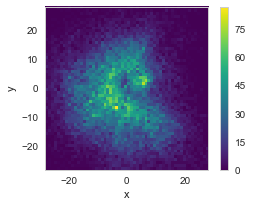

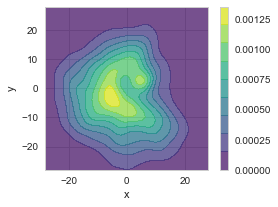

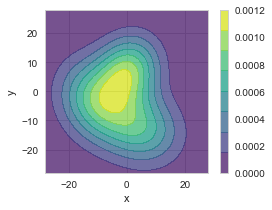

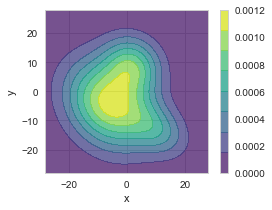

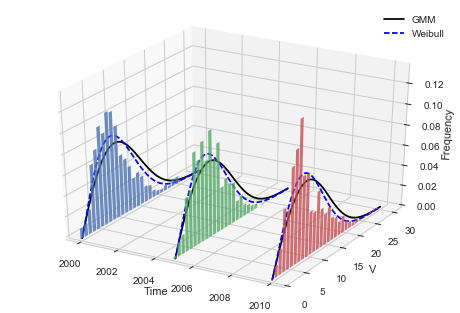

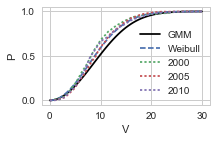

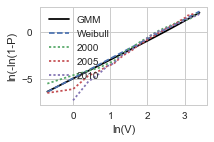

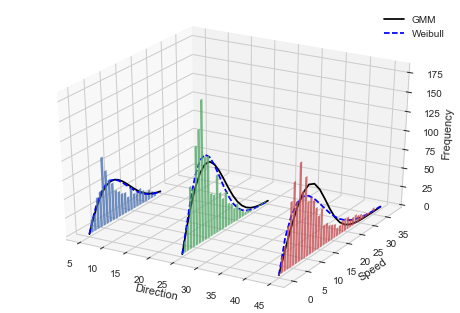

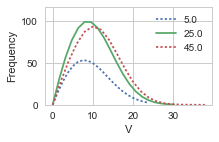

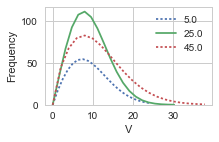

In [73]:
for fig in [fig_hist, fig_kde, fig_em, fig_gmm]:
    display(fig)
for fig in [fig_time_variability_3d, fig_time_variability_cdf, fig_time_variability_weibull, 
            fig_adjecent_variability_3d, fig_adjecent_variability_cdf, fig_adjecent_variability_weibull,]:
    display(fig)

In [74]:
import time
save_notebook()
time.sleep(3)
location_name = get_location_name(ipath)
current_file = 'GMM.ipynb'
output_file = './output_HTML/'+location_name+'.html' 
output_HTML(current_file, output_file)